# Deep Learning for analysis of your project data (if possible).

Apply a Deep Learning model to your project data (if possible). You can use another data set ONLY if it makes no sense to use a Deep Learning model for your project.

THIS MUST BE DONE USING Tensor Flow. Not Keras, H2O, or some other high level API.

## Intro to TensorFlow Tutorials

TensorFlow 101 (Really Awesome Intro Into TensorFlow) https://youtu.be/arl8O22aa6I

Getting Started with TensorFlow and Deep Learning | SciPy 2018 Tutorial ... https://youtu.be/tYYVSEHq-io

Hands-on TensorBoard (TensorFlow Dev Summit 2017) https://youtu.be/eBbEDRsCmv4

## Reference Material TensorFlow

Below are the reference links to material and tutorials to learn more on TensorFlow:

https://drive.google.com/open?id=1QGxwq3MSVNyUkXTjY7hXA6Q--WOXRAUDhttps://www.tensorflow.org/tutorials/ https://www.datacamp.com/community/tutorials/tensorflow-tutorial https://github.com/Hvass-Labs/TensorFlow-Tutorialshttps://chromium.googlesource.com/external/github.com/tensorflow/tensorflow/+/r0.7/tensor-flow/g3doc/tutorials/index.mdhttps://pythonprogramming.net/tensorflow-introduction-machine-learning-tutorial/

## Melbourne Housing Dataset - Upload & EDA

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.api as sm 
import tensorflow as tf
%matplotlib inline
import pylab as pl

In [2]:
print(tf.__version__)s

1.12.0


In [3]:
# Importing the dataset
data = pd.read_csv('newfile.csv')

In [4]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
data.head()

Suburb          Address  Rooms Type      Price  Postcode  Bedroom2  \
0  Abbotsford  25 Bloomburg St      2    h  1035000.0    3067.0       2.0   
1  Abbotsford     5 Charles St      3    h  1465000.0    3067.0       3.0   
2  Abbotsford      55a Park St      4    h  1600000.0    3067.0       3.0   
3  Abbotsford     124 Yarra St      3    h  1876000.0    3067.0       4.0   
4  Abbotsford    98 Charles St      2    h  1636000.0    3067.0       2.0   

   Bathroom  Car  Landsize  BuildingArea YearBuilt         CouncilArea  \
0       1.0  0.0     156.0          79.0    1900.0  Yarra City Council   
1       2.0  0.0     134.0         150.0    1900.0  Yarra City Council   
2       1.0  2.0     120.0         142.0    2014.0  Yarra City Council   
3       2.0  0.0     245.0         210.0    1910.0  Yarra City Council   
4       1.0  2.0     256.0         107.0    1890.0  Yarra City Council   

   Lattitude Longtitude             Regionname  
0   -37.8079   144.9934  Northern Metropolitan  
1   -37.8093   144.9944  Northern Metropolitan  
2   -37.8072   144.9941  Northern Metropolitan  
3   -37.8024   144.9993  Northern Metropolitan  
4   -37.8060   144.9954  Northern Metropolitan

In [6]:
X = data.iloc[:, 6: 10].values # Bedroom2, Bathroom, Car, Landsize Columns called for x
y = data.iloc[:, 4].values # Price Columns called  for y

In [7]:
# Splitting the dataset into the Training & Test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 0)

# Part A - Deep Learning model (25 points)
On your project data
- Apply a Deep Learning model to your project data (if possible). Validate the accuracy.
- The Deep Learning model can be a **MLP**, CNN, RNN, Autoencoder, Variational autoencoder (VAE), Restricted Boltzmann machine (RBM), Deep belief network (DBN) or Generative Model.

## Multi-layer Perceptron (MLP) Regression

In [8]:
# Model structure:
n_input = 4
n_hidden_1 = 100
n_hidden_2 = 50
n_hidden_3 = 25
n_output = 1
logs_path = '/tmp/tensorflow_logs/example/'

In [9]:
# Set placeholder
X = tf.placeholder(dtype=tf.float32, shape=[None, n_input])
Y = tf.placeholder(dtype=tf.float32, shape=[None])

In [10]:
# Initializer
sigma = 1
weight_initializer = tf.variance_scaling_initializer(mode="fan_avg", distribution="truncated_normal", scale=sigma)
bias_initializer = tf.zeros_initializer()

In [11]:
# Hidden Weights
W_hidden_1 = tf.Variable(weight_initializer([n_input, n_hidden_1]))
W_hidden_2 = tf.Variable(weight_initializer([n_hidden_1, n_hidden_2]))
W_hidden_3 = tf.Variable(weight_initializer([n_hidden_2, n_hidden_3]))
W_out = tf.Variable(weight_initializer([n_hidden_3, n_output]))

# Hidden Biases
B_hidden_1 = tf.Variable(bias_initializer([n_hidden_1]))
B_hidden_2 = tf.Variable(bias_initializer([n_hidden_2]))
B_hidden_3 = tf.Variable(bias_initializer([n_hidden_3]))
B_out = tf.Variable(bias_initializer([n_output]))

In [12]:
# Hidden Layer:
hidden_1 = tf.nn.relu(tf.add(tf.matmul(X, W_hidden_1), B_hidden_1))
hidden_2 = tf.nn.relu(tf.add(tf.matmul(hidden_1, W_hidden_2), B_hidden_2))
hidden_3 = tf.nn.relu(tf.add(tf.matmul(hidden_2, W_hidden_3), B_hidden_3))

# Output Layer:
out = tf.transpose(tf.add(tf.matmul(hidden_3, W_out), B_out))

In [13]:
# Cost function(RMSE):
rmse = tf.reduce_mean(tf.squared_difference(out, Y))

In [14]:
# Optimizer:
opt = tf.train.AdamOptimizer().minimize(rmse)

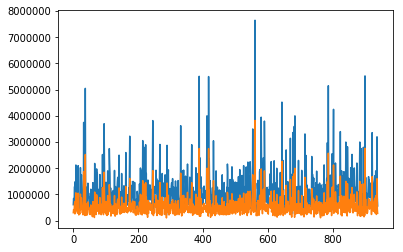

417228500000.0
Run the command line:
--> tensorboard --logdir=/tmp/tensorflow_logs 
Then open http://0.0.0.0:6006/ into your web browser


In [15]:
# Define a session:
sess = tf.Session()

# Run initializer
sess.run(tf.global_variables_initializer())
summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())

# Set epochs and batch size:
epochs = 100
batch_size = 100

for e in range(epochs):

    # Upset training set:
    shuffle_indices = np.random.permutation(np.arange(len(y_train)))
    X_train = X_train[shuffle_indices]
    y_train = y_train[shuffle_indices]

    # Minibatch training:
    for i in range(0, len(y_train) // batch_size):
        start = i * batch_size
        batch_x = X_train[start:start + batch_size]
        batch_y = y_train[start:start + batch_size]
        
        sess.run(opt, feed_dict={X: batch_x, Y: batch_y})

# Show plot
plt.ion()
fig = plt.figure()
ax1 = fig.add_subplot(111)
line1, = ax1.plot(y_test)
line2, = ax1.plot(y_test*0.5)
plt.show()

# Show the final rmse when finish running:
rmse_final = sess.run(rmse, feed_dict={X: X_test, Y: y_test})
print(rmse_final)

# Test model
print("Run the command line:\n" \
          "--> tensorboard --logdir=/tmp/tensorflow_logs " \
          "\nThen open http://0.0.0.0:6006/ into your web browser")

# Part B - Activation function (10 points)

On your Deep Learning model data apply at least two different activation functions.

- Change the activation function. How does it effect the accuracy?
- How does it effect how quickly the network plateaus?
- Various activation functions:
- **Rectified linear unit (ReLU)** [Done in Part A]
- **TanH**
- Leaky rectified linear unit (Leaky ReLU)
- Parameteric rectified linear unit (PReLU)
- Randomized leaky rectified linear unit (RReLU)
- Exponential linear unit (ELU)
- Scaled exponential linear unit (SELU)
- S-shaped rectified linear activation unit (SReLU)
- Identity
- Binary step
- Logistic
- ArcTan
- Softsign
- Adaptive piecewise linear (APL)
- SoftPlus
- SoftExponential
- Sinusoid
- Sinc
- Gaussian

## TanH

In [16]:
# Cost function(MSE):
mse = tf.reduce_mean(tf.squared_difference(out, Y))

In [17]:
# Optimizer:
opt = tf.train.AdamOptimizer().minimize(mse)

In [18]:
# Initializer:
sigma = 1
weight_initializer = tf.variance_scaling_initializer(mode="fan_avg", distribution="truncated_normal", scale=sigma)
bias_initializer = tf.zeros_initializer()

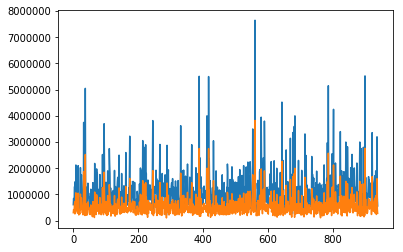

424044000000.0
Run the command line:
--> tensorboard --logdir=/tmp/tensorflow_logs 
Then open http://0.0.0.0:6006/ into your web browser


In [19]:
# Define a session:
sess = tf.Session()
# Run initializer
sess.run(tf.global_variables_initializer())


# Set epochs and batch size:
epochs = 100
batch_size = 100

for e in range(epochs):

    # Upset training set:
    shuffle_indices = np.random.permutation(np.arange(len(y_train)))
    X_train = X_train[shuffle_indices]
    y_train = y_train[shuffle_indices]

    # Minibatch training:
    for i in range(0, len(y_train) // batch_size):
        start = i * batch_size
        batch_x = X_train[start:start + batch_size]
        batch_y = y_train[start:start + batch_size]
        
        sess.run(opt, feed_dict={X: batch_x, Y: batch_y})

# Show plot
plt.ion()
fig = plt.figure()
ax1 = fig.add_subplot(111)
line1, = ax1.plot(y_test)
line2, = ax1.plot(y_test*0.5)
plt.show()

# Show the final mse when finish running:
mse_final = sess.run(mse, feed_dict={X: X_test, Y: y_test})
print(mse_final)

# Test model
print("Run the command line:\n" \
          "--> tensorboard --logdir=/tmp/tensorflow_logs " \
          "\nThen open http://0.0.0.0:6006/ into your web browser")

##### Activation function: 
- Relu: 417228500000.0
- Tanh: 424044000000.0

From this we can see that **Relu gives a higher accuracy** as the Relu function is less than that of the Relu activation function

# Part C - Cost function (10 points)

On your Deep Learning model data at least two different cost functions.

- Change the cost function. How does it effect the accuracy?
- How does it effect how quickly the network plateaus?
- Various forms of cost:
- **Quadratic cost (mean-square error)**
- Cross-Entropy
- Hinge
- Kullback–Leibler divergence
- Cosine Proximity
- User defined

And many more, see https://keras.io/losses/

## Cost function - Mean Absolute Error (MAE)

In [20]:
# Changing Activation Function to Relu
# Hidden Layer:
hidden_1 = tf.nn.relu(tf.add(tf.matmul(X, W_hidden_1), B_hidden_1))
hidden_2 = tf.nn.relu(tf.add(tf.matmul(hidden_1, W_hidden_2), B_hidden_2))
hidden_3 = tf.nn.relu(tf.add(tf.matmul(hidden_2, W_hidden_3), B_hidden_3))

# Output Layer:
out = tf.transpose(tf.add(tf.matmul(hidden_3, W_out), B_out))

In [21]:
# Cost function(MAE):
mae = tf.reduce_mean(tf.subtract(out, Y))

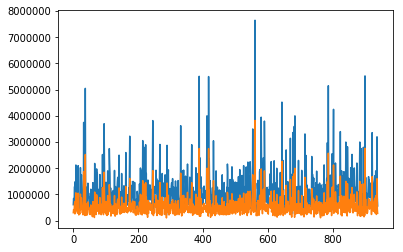

-8433.837
Run the command line:
--> tensorboard --logdir=/tmp/tensorflow_logs 
Then open http://0.0.0.0:6006/ into your web browser


In [22]:
# Define a session:
sess = tf.Session()
# Run initializer
sess.run(tf.global_variables_initializer())


# Set epochs and batch size:
epochs = 100
batch_size = 100

for e in range(epochs):

    # Upset training set:
    shuffle_indices = np.random.permutation(np.arange(len(y_train)))
    X_train = X_train[shuffle_indices]
    y_train = y_train[shuffle_indices]

    # Minibatch training:
    for i in range(0, len(y_train) // batch_size):
        start = i * batch_size
        batch_x = X_train[start:start + batch_size]
        batch_y = y_train[start:start + batch_size]
        
        sess.run(opt, feed_dict={X: batch_x, Y: batch_y})

# Show plot
plt.ion()
fig = plt.figure()
ax1 = fig.add_subplot(111)
line1, = ax1.plot(y_test)
line2, = ax1.plot(y_test*0.5)
plt.show()

# Show the final mae when finish running:
mae_final = sess.run(mae, feed_dict={X: X_test, Y: y_test})
print(mae_final)

# Test model
print("Run the command line:\n" \
          "--> tensorboard --logdir=/tmp/tensorflow_logs " \
          "\nThen open http://0.0.0.0:6006/ into your web browser")

##### Cost function: 
- MSE: 417228500000.0
- MAE: -8433.837

# Part D - Epochs (10 points)

On your Deep Learning model data

- Change the number of epochs initialization. How does it effect the accuracy?
- How quickly does the network plateau?

## Epochs: 100 to 50

In [23]:
# Cost function(MSE):
mse = tf.reduce_mean(tf.squared_difference(out, Y))

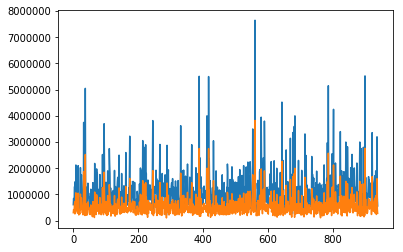

475172080000.0
Run the command line:
--> tensorboard --logdir=/tmp/tensorflow_logs 
Then open http://0.0.0.0:6006/ into your web browser


In [24]:
# Define a session:
sess = tf.Session()
# Run initializer
sess.run(tf.global_variables_initializer())


# Set epochs and batch size:
epochs = 50
batch_size = 100

for e in range(epochs):

    # Upset training set:
    shuffle_indices = np.random.permutation(np.arange(len(y_train)))
    X_train = X_train[shuffle_indices]
    y_train = y_train[shuffle_indices]

    # Minibatch training:
    for i in range(0, len(y_train) // batch_size):
        start = i * batch_size
        batch_x = X_train[start:start + batch_size]
        batch_y = y_train[start:start + batch_size]
        
        sess.run(opt, feed_dict={X: batch_x, Y: batch_y})

# Show plot
plt.ion()
fig = plt.figure()
ax1 = fig.add_subplot(111)
line1, = ax1.plot(y_test)
line2, = ax1.plot(y_test*0.5)
plt.show()

# Show the final mse when finish running:
mse_final = sess.run(mse, feed_dict={X: X_test, Y: y_test})
print(mse_final)

# Test model
print("Run the command line:\n" \
          "--> tensorboard --logdir=/tmp/tensorflow_logs " \
          "\nThen open http://0.0.0.0:6006/ into your web browser")

##### Epoch:
- Epoch: 50:  475172080000.0
- Epoch: 100: 417228500000.0

Difference of 57943580000 between Epoch 100 & Epoch 50

Epoch is when an **ENTIRE** dataset is passed forward and backward through the neural network by a number of times stated by us. In this instance we set two Epochs on at 100 and the next at 50, to measure the best outcome.

In this case we see that 100 Epochs has a better MSE that with 50 Epochs

## Part E - Gradient estimation (10 points)

On your Deep Learning model data at least two qradient estimation algorithms.

- Change the gradient estimation. How does it effect the accuracy?
- How does it effect how quickly the network plateaus?
- Various forms of gradient estimation:
- Stochastic Gradient Descent
- **Adagrad**
- **RMSProp**
- **ADAM** [used on Part A to D]
- NAG
- Adadelta
- Momentum

## Adagrad

In [25]:
# Model structure:
n_input = 4
n_hidden_1 = 100
n_hidden_2 = 50
n_hidden_3 = 25
n_output = 1
learning_rate = 0.02

In [26]:
# Set placeholder
X = tf.placeholder(dtype=tf.float32, shape=[None, n_input])
Y = tf.placeholder(dtype=tf.float32, shape=[None])

In [27]:
# Initializer
sigma = 1
weight_initializer = tf.variance_scaling_initializer(mode="fan_avg", distribution="truncated_normal", scale=sigma)
bias_initializer = tf.zeros_initializer()

In [28]:
# Hidden Weights
W_hidden_1 = tf.Variable(weight_initializer([n_input, n_hidden_1]))
W_hidden_2 = tf.Variable(weight_initializer([n_hidden_1, n_hidden_2]))
W_hidden_3 = tf.Variable(weight_initializer([n_hidden_2, n_hidden_3]))
W_out = tf.Variable(weight_initializer([n_hidden_3, n_output]))

# Hidden Biases
B_hidden_1 = tf.Variable(bias_initializer([n_hidden_1]))
B_hidden_2 = tf.Variable(bias_initializer([n_hidden_2]))
B_hidden_3 = tf.Variable(bias_initializer([n_hidden_3]))
B_out = tf.Variable(bias_initializer([n_output]))

In [29]:
# Hidden Layer:
hidden_1 = tf.nn.relu(tf.add(tf.matmul(X, W_hidden_1), B_hidden_1))
hidden_2 = tf.nn.relu(tf.add(tf.matmul(hidden_1, W_hidden_2), B_hidden_2))
hidden_3 = tf.nn.relu(tf.add(tf.matmul(hidden_2, W_hidden_3), B_hidden_3))

# Output Layer:
out = tf.transpose(tf.add(tf.matmul(hidden_3, W_out), B_out))

In [30]:
# Cost function(RMSE):
mse = tf.reduce_mean(tf.squared_difference(out, Y))

In [31]:
# Optimizer:
opt = tf.train.AdagradOptimizer(learning_rate).minimize(mse)

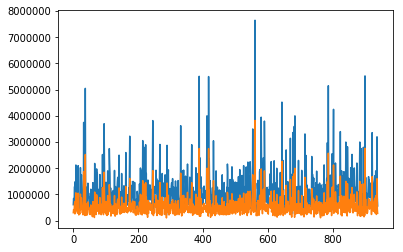

819405800000.0
Run the command line:
--> tensorboard --logdir=/tmp/tensorflow_logs 
Then open http://0.0.0.0:6006/ into your web browser


In [32]:
# Define a session:
sess = tf.Session()
# Run initializer
sess.run(tf.global_variables_initializer())


# Set epochs and batch size:
epochs = 100
batch_size = 100

for e in range(epochs):

    # Upset training set:
    shuffle_indices = np.random.permutation(np.arange(len(y_train)))
    X_train = X_train[shuffle_indices]
    y_train = y_train[shuffle_indices]

    # Minibatch training:
    for i in range(0, len(y_train) // batch_size):
        start = i * batch_size
        batch_x = X_train[start:start + batch_size]
        batch_y = y_train[start:start + batch_size]
        
        sess.run(opt, feed_dict={X: batch_x, Y: batch_y})

# Show plot
plt.ion()
fig = plt.figure()
ax1 = fig.add_subplot(111)
line1, = ax1.plot(y_test)
line2, = ax1.plot(y_test*0.5)
plt.show()

# Show the final mse when finish running:
mse_final = sess.run(mse, feed_dict={X: X_test, Y: y_test})
print(mse_final)

# Test model
print("Run the command line:\n" \
          "--> tensorboard --logdir=/tmp/tensorflow_logs " \
          "\nThen open http://0.0.0.0:6006/ into your web browser")

## RMSProp

In [33]:
# Optimizer:
opt = tf.train.RMSPropOptimizer(learning_rate).minimize(mse)

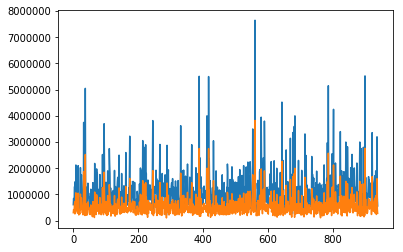

472130650000.0
Run the command line:
--> tensorboard --logdir=/tmp/tensorflow_logs 
Then open http://0.0.0.0:6006/ into your web browser


In [34]:
# Define a session:
sess = tf.Session()
# Run initializer
sess.run(tf.global_variables_initializer())


# Set epochs and batch size:
epochs = 100
batch_size = 100

for e in range(epochs):

    # Upset training set:
    shuffle_indices = np.random.permutation(np.arange(len(y_train)))
    X_train = X_train[shuffle_indices]
    y_train = y_train[shuffle_indices]

    # Minibatch training:
    for i in range(0, len(y_train) // batch_size):
        start = i * batch_size
        batch_x = X_train[start:start + batch_size]
        batch_y = y_train[start:start + batch_size]
        
        sess.run(opt, feed_dict={X: batch_x, Y: batch_y})

# Show plot
plt.ion()
fig = plt.figure()
ax1 = fig.add_subplot(111)
line1, = ax1.plot(y_test)
line2, = ax1.plot(y_test*0.5)
plt.show()

# Show the final mse when finish running:
mse_final = sess.run(mse, feed_dict={X: X_test, Y: y_test})
print(mse_final)

# Test model
print("Run the command line:\n" \
          "--> tensorboard --logdir=/tmp/tensorflow_logs " \
          "\nThen open http://0.0.0.0:6006/ into your web browser")

##### Optimizer: 
- AdamOptimizer:     417228500000.0
- AdagradOptimizer:  819405800000.0
- RMSPropOptimizer:  472130650000.0

**AdamOptimizer has the smallest MSE**, which makes AdamOptimizer a more effective optimizer than AdagradOptimizer & RMSPropOptimizer

# Part F - Network Architecture (10 points)

On your Deep Learning model data

- Change the network architecture. How does it effect the accuracy?
- How does it effect how quickly the network plateaus?
- Various forms of network architecture:
- Number of layers
- Size of each layer
- Connection type
- Pre-trained components?

## Network Structure: 3 Layer to 2 Layer

In [35]:
# Changed Model structure:
N_input = 4
N_hidden_1 = 50
N_hidden_2 = 25
N_output = 1

In [36]:
# Set placeholder
X = tf.placeholder(dtype=tf.float32, shape=[None, n_input])
Y = tf.placeholder(dtype=tf.float32, shape=[None])

In [37]:
# Initializer
sigma = 1
weight_initializer = tf.variance_scaling_initializer(mode="fan_avg", distribution="truncated_normal", scale=sigma)
bias_initializer = tf.zeros_initializer()

In [38]:
# First hidden layer : 
W_hidden_1 = tf.Variable(weight_initializer([N_input, N_hidden_1]))
B_hidden_1 = tf.Variable(bias_initializer([N_hidden_1]))

# Second Layer :
W_hidden_2 = tf.Variable(weight_initializer([N_hidden_1, N_hidden_2]))
B_hidden_2 = tf.Variable(bias_initializer([N_hidden_2]))

# Output Layer: 
W_out = tf.Variable(weight_initializer([N_hidden_2, N_output]))
B_out = tf.Variable(bias_initializer([N_output]))

In [39]:
# Hidden Layer:
hidden_1 = tf.nn.relu(tf.add(tf.matmul(X, W_hidden_1), B_hidden_1))
hidden_2 = tf.nn.relu(tf.add(tf.matmul(hidden_1, W_hidden_2), B_hidden_2))

# Output Layer:
out = tf.transpose(tf.add(tf.matmul(hidden_2, W_out), B_out))

In [40]:
# Cost function(RMSE):
mse = tf.reduce_mean(tf.squared_difference(out, Y))

In [41]:
# Optimizer:
opt = tf.train.AdamOptimizer().minimize(mse)

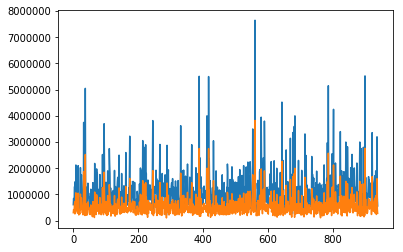

1603120000000.0
Run the command line:
--> tensorboard --logdir=/tmp/tensorflow_logs 
Then open http://0.0.0.0:6006/ into your web browser


In [42]:
# Define a session:
sess = tf.Session()
# Run initializer
sess.run(tf.global_variables_initializer())


# Set epochs and batch size:
epochs = 50
batch_size = 100

for e in range(epochs):

    # Upset training set:
    shuffle_indices = np.random.permutation(np.arange(len(y_train)))
    X_train = X_train[shuffle_indices]
    y_train = y_train[shuffle_indices]

    # Minibatch training:
    for i in range(0, len(y_train) // batch_size):
        start = i * batch_size
        batch_x = X_train[start:start + batch_size]
        batch_y = y_train[start:start + batch_size]
        
        sess.run(opt, feed_dict={X: batch_x, Y: batch_y})

# Show plot
plt.ion()
fig = plt.figure()
ax1 = fig.add_subplot(111)
line1, = ax1.plot(y_test)
line2, = ax1.plot(y_test*0.5)
plt.show()

# Show the final mse when finish running:
mse_final = sess.run(mse, feed_dict={X: X_test, Y: y_test})
print(mse_final)

# Test model
print("Run the command line:\n" \
          "--> tensorboard --logdir=/tmp/tensorflow_logs " \
          "\nThen open http://0.0.0.0:6006/ into your web browser")

##### Network Architechure:
Number of hidden layers

- 3 Layers: 417228500000.0
- 2 Layers: 1603120000000.0

By reducing the number of layers and number of nodes per layer we have **increased the MSE**, meaning the error has increased. By having **more hidden layers and mode nodes per layer**, we increase the chance of getting a **higher prediction of house prices** in Melbourne, Australia.

# Part G - Network initialization (10 points)

On your Deep Learning model data at least two network initialization techniques.

- Change the network initialization. How does it effect the accuracy?
- How does it effect how quickly the network plateaus?
- Various forms of network initialization:
- 0
- Uniform
- Gaussian
- Xavier Glorot Initialization http://andyljones.tumblr.com/post/110998971763/an-explanation-of-xavier-initialization
    - **Xavier Uniform**
    - Xavier Gaussian

## Xavier Uniform Initialization

In [43]:
# Model structure:
n_input = 4
n_hidden_1 = 100
n_hidden_2 = 50
n_hidden_3 = 25
n_output = 1

In [44]:
# Xavier Uniform Initialization
sigma = 1
wieght_initializer = tf.contrib.layers.xavier_initializer(uniform=True, seed=None, dtype=tf.float32)
bias_initializer = tf.contrib.layers.xavier_initializer(uniform=True, seed=None, dtype=tf.float32)

In [45]:
# Hidden Weights
W_hidden_1 = tf.Variable(weight_initializer([n_input, n_hidden_1]))
W_hidden_2 = tf.Variable(weight_initializer([n_hidden_1, n_hidden_2]))
W_hidden_3 = tf.Variable(weight_initializer([n_hidden_2, n_hidden_3]))
W_out = tf.Variable(weight_initializer([n_hidden_3, n_output]))

# Hidden Biases
B_hidden_1 = tf.Variable(bias_initializer([n_hidden_1]))
B_hidden_2 = tf.Variable(bias_initializer([n_hidden_2]))
B_hidden_3 = tf.Variable(bias_initializer([n_hidden_3]))
B_out = tf.Variable(bias_initializer([n_output]))

In [46]:
# Hidden Layer:
hidden_1 = tf.nn.relu(tf.add(tf.matmul(X, W_hidden_1), B_hidden_1))
hidden_2 = tf.nn.relu(tf.add(tf.matmul(hidden_1, W_hidden_2), B_hidden_2))
hidden_3 = tf.nn.relu(tf.add(tf.matmul(hidden_2, W_hidden_3), B_hidden_3))

# Output Layer:
out = tf.transpose(tf.add(tf.matmul(hidden_3, W_out), B_out))

In [47]:
# Cost function(RMSE):
rmse = tf.reduce_mean(tf.squared_difference(out, Y))

In [48]:
# Optimizer:
opt = tf.train.AdamOptimizer().minimize(rmse)

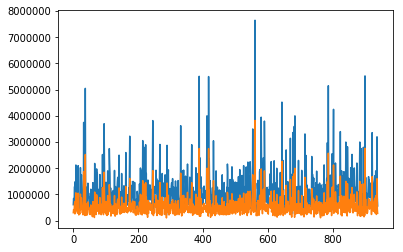

1807143300000.0
Run the command line:
--> tensorboard --logdir=/tmp/tensorflow_logs 
Then open http://0.0.0.0:6006/ into your web browser


In [49]:
# Define a session:
sess = tf.Session()

# Run initializer
sess.run(tf.global_variables_initializer())


# Set epochs and batch size:
epochs = 100
batch_size = 100

for e in range(epochs):

    # Upset training set:
    shuffle_indices = np.random.permutation(np.arange(len(y_train)))
    X_train = X_train[shuffle_indices]
    y_train = y_train[shuffle_indices]

    # Minibatch training:
    for i in range(0, len(y_train) // batch_size):
        start = i * batch_size
        batch_x = X_train[start:start + batch_size]
        batch_y = y_train[start:start + batch_size]
        
        sess.run(opt, feed_dict={X: batch_x, Y: batch_y})

# Show plot
plt.ion()
fig = plt.figure()
ax1 = fig.add_subplot(111)
line1, = ax1.plot(y_test)
line2, = ax1.plot(y_test*0.5)
plt.show()

# Show the final mse when finish running:
mse_final = sess.run(mse, feed_dict={X: X_test, Y: y_test})
print(mse_final)

# Test model
print("Run the command line:\n" \
          "--> tensorboard --logdir=/tmp/tensorflow_logs " \
          "\nThen open http://0.0.0.0:6006/ into your web browser")

##  Truncated Normal Initialization

In [50]:
# Truncated Initialization
sigma = 1
wieght_initializer = tf.truncated_normal_initializer(stddev=1.0, seed=None)
bias_initializer = tf.zeros_initializer()

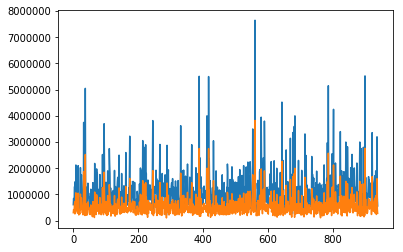

1807126800000.0
Run the command line:
--> tensorboard --logdir=/tmp/tensorflow_logs 
Then open http://0.0.0.0:6006/ into your web browser


In [51]:
# Define a session:
sess = tf.Session()

# Run initializer
sess.run(tf.global_variables_initializer())
summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())

# Set epochs and batch size:
epochs = 100
batch_size = 100

for e in range(epochs):

    # Upset training set:
    shuffle_indices = np.random.permutation(np.arange(len(y_train)))
    X_train = X_train[shuffle_indices]
    y_train = y_train[shuffle_indices]

    # Minibatch training:
    for i in range(0, len(y_train) // batch_size):
        start = i * batch_size
        batch_x = X_train[start:start + batch_size]
        batch_y = y_train[start:start + batch_size]
        
        sess.run(opt, feed_dict={X: batch_x, Y: batch_y})

# Show plot
plt.ion()
fig = plt.figure()
ax1 = fig.add_subplot(111)
line1, = ax1.plot(y_test)
line2, = ax1.plot(y_test*0.5)
plt.show()

# Show the final mse when finish running:
mse_final = sess.run(mse, feed_dict={X: X_test, Y: y_test})
print(mse_final)

# Test model
print("Run the command line:\n" \
          "--> tensorboard --logdir=/tmp/tensorflow_logs " \
          "\nThen open http://0.0.0.0:6006/ into your web browser")

##### Initializer:
Using Xavier Uniform & ------ while compared to Weight Initializer

- Weight:         417228500000.0
- Truncated:      1807126800000.0
- Xavier Uniform: 1807143300000.0 


# Part H - TensorBoard (15 points)
Visualize Parts B thru G using TensorBoard.

Last update October 3, 2017

The text is released under the CC-BY-NC-ND license, and code is released under the MIT license.

### Images attached in zip file of project

**Part A**

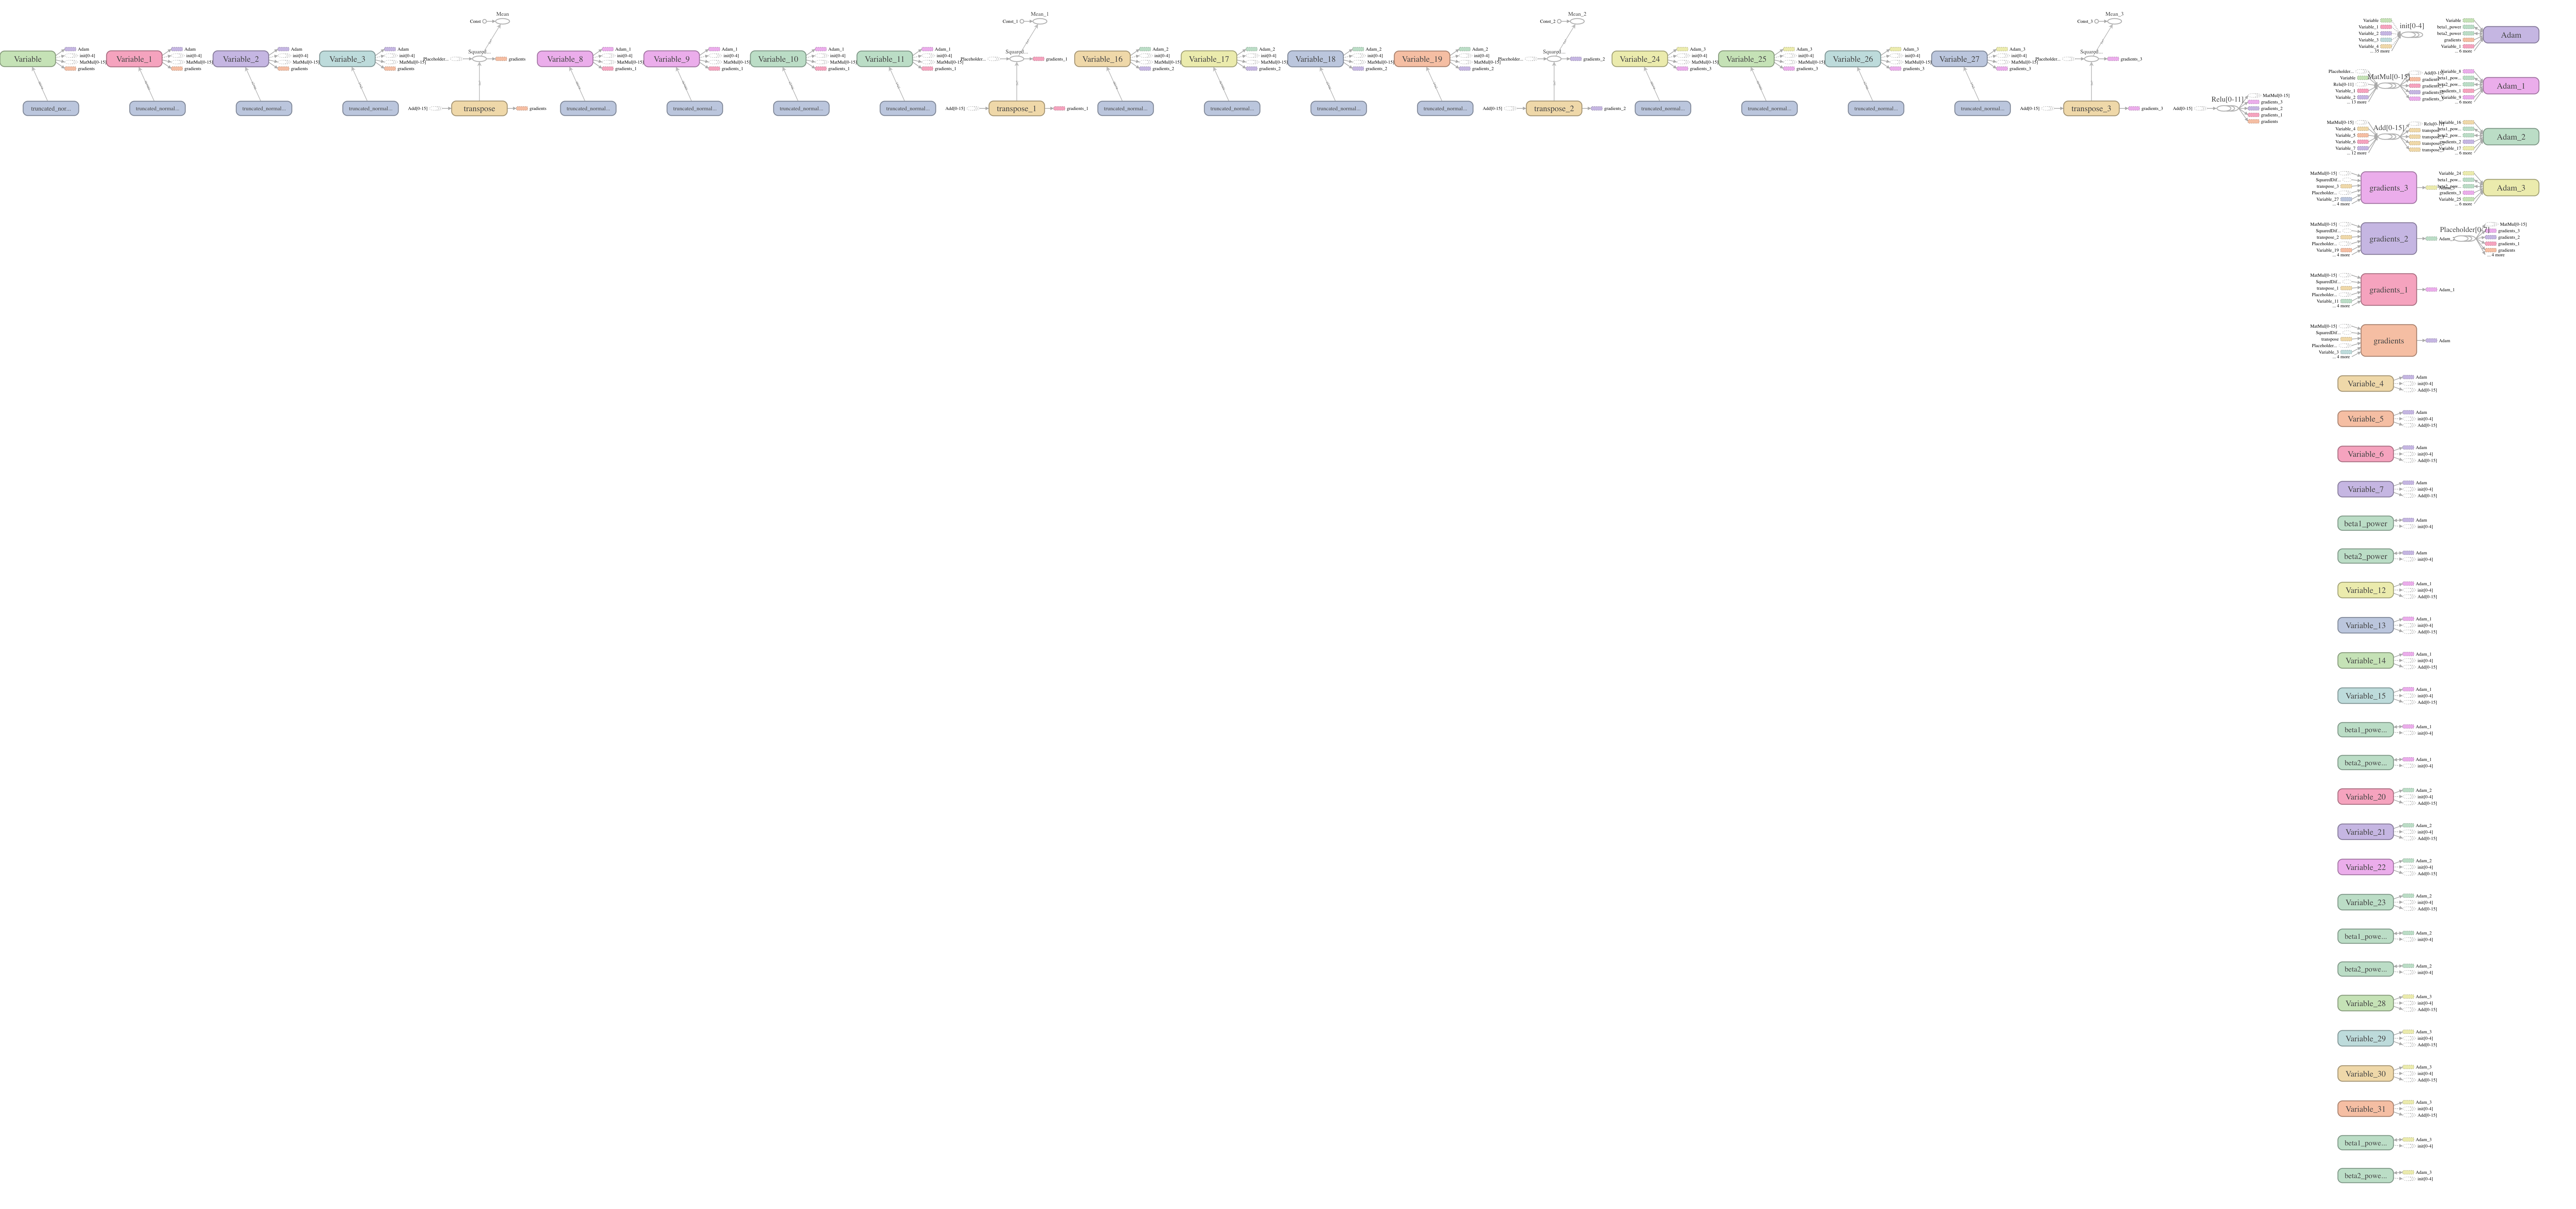

**Part B**

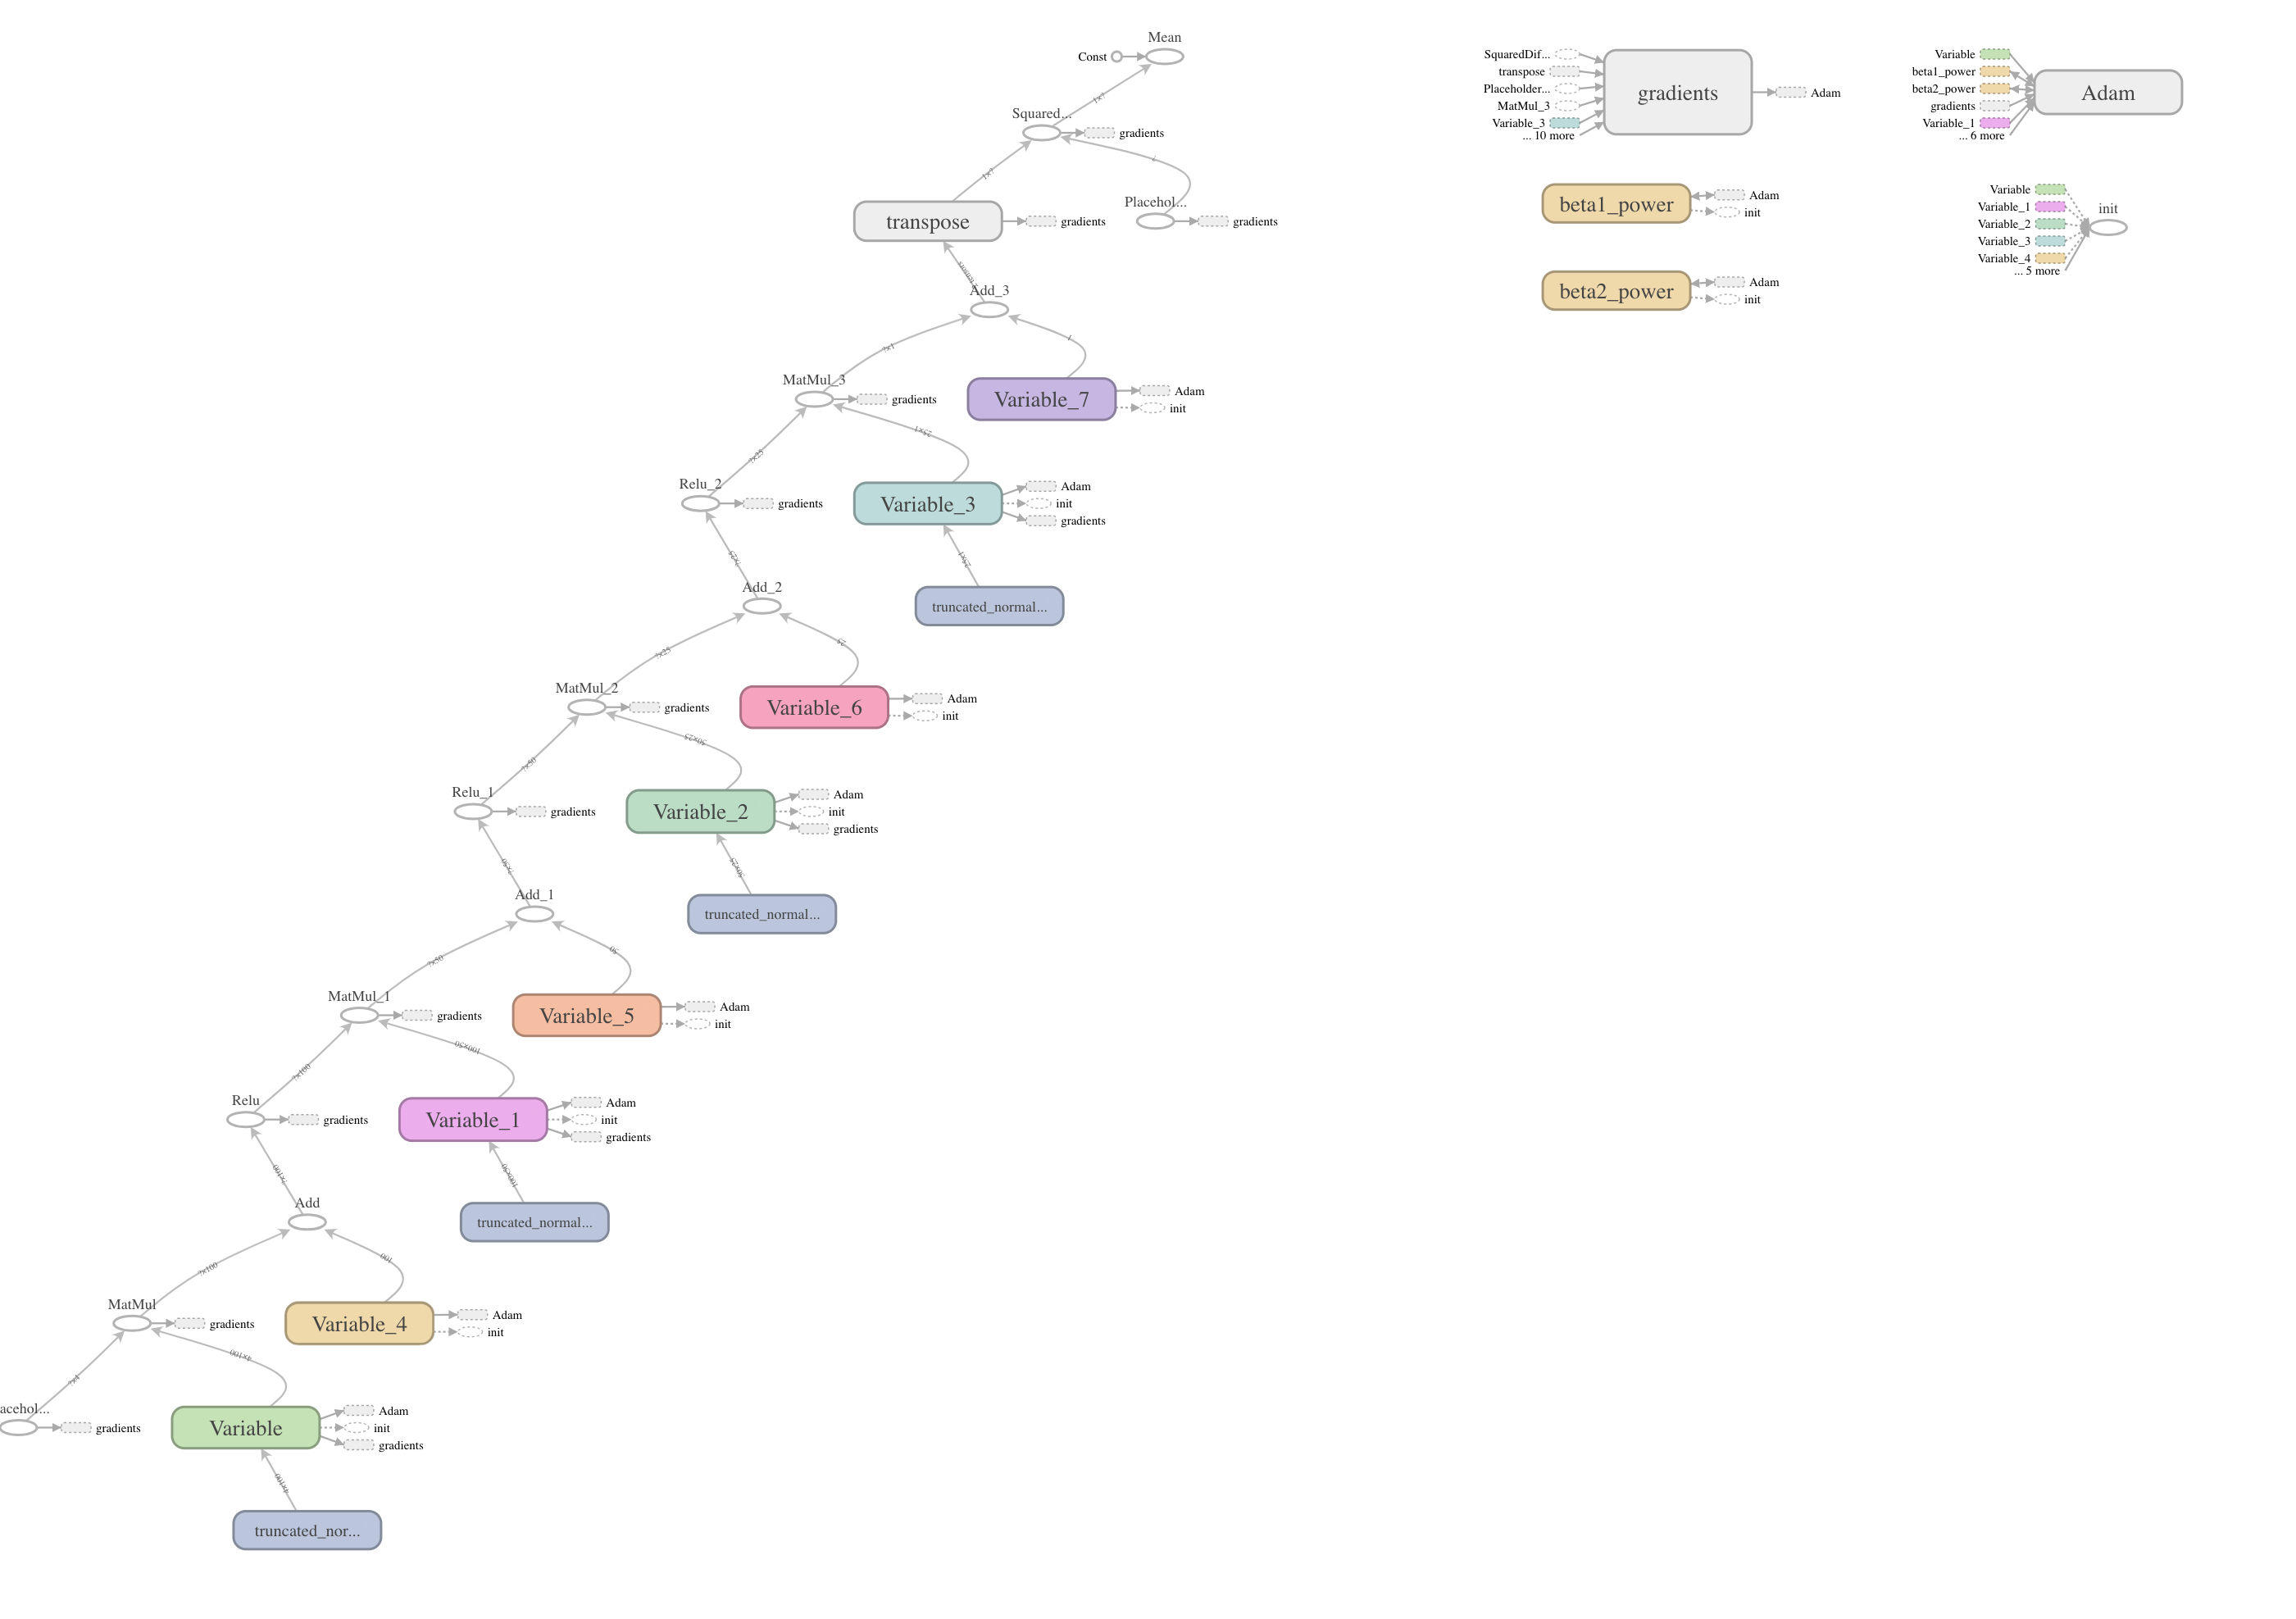

**Part C**

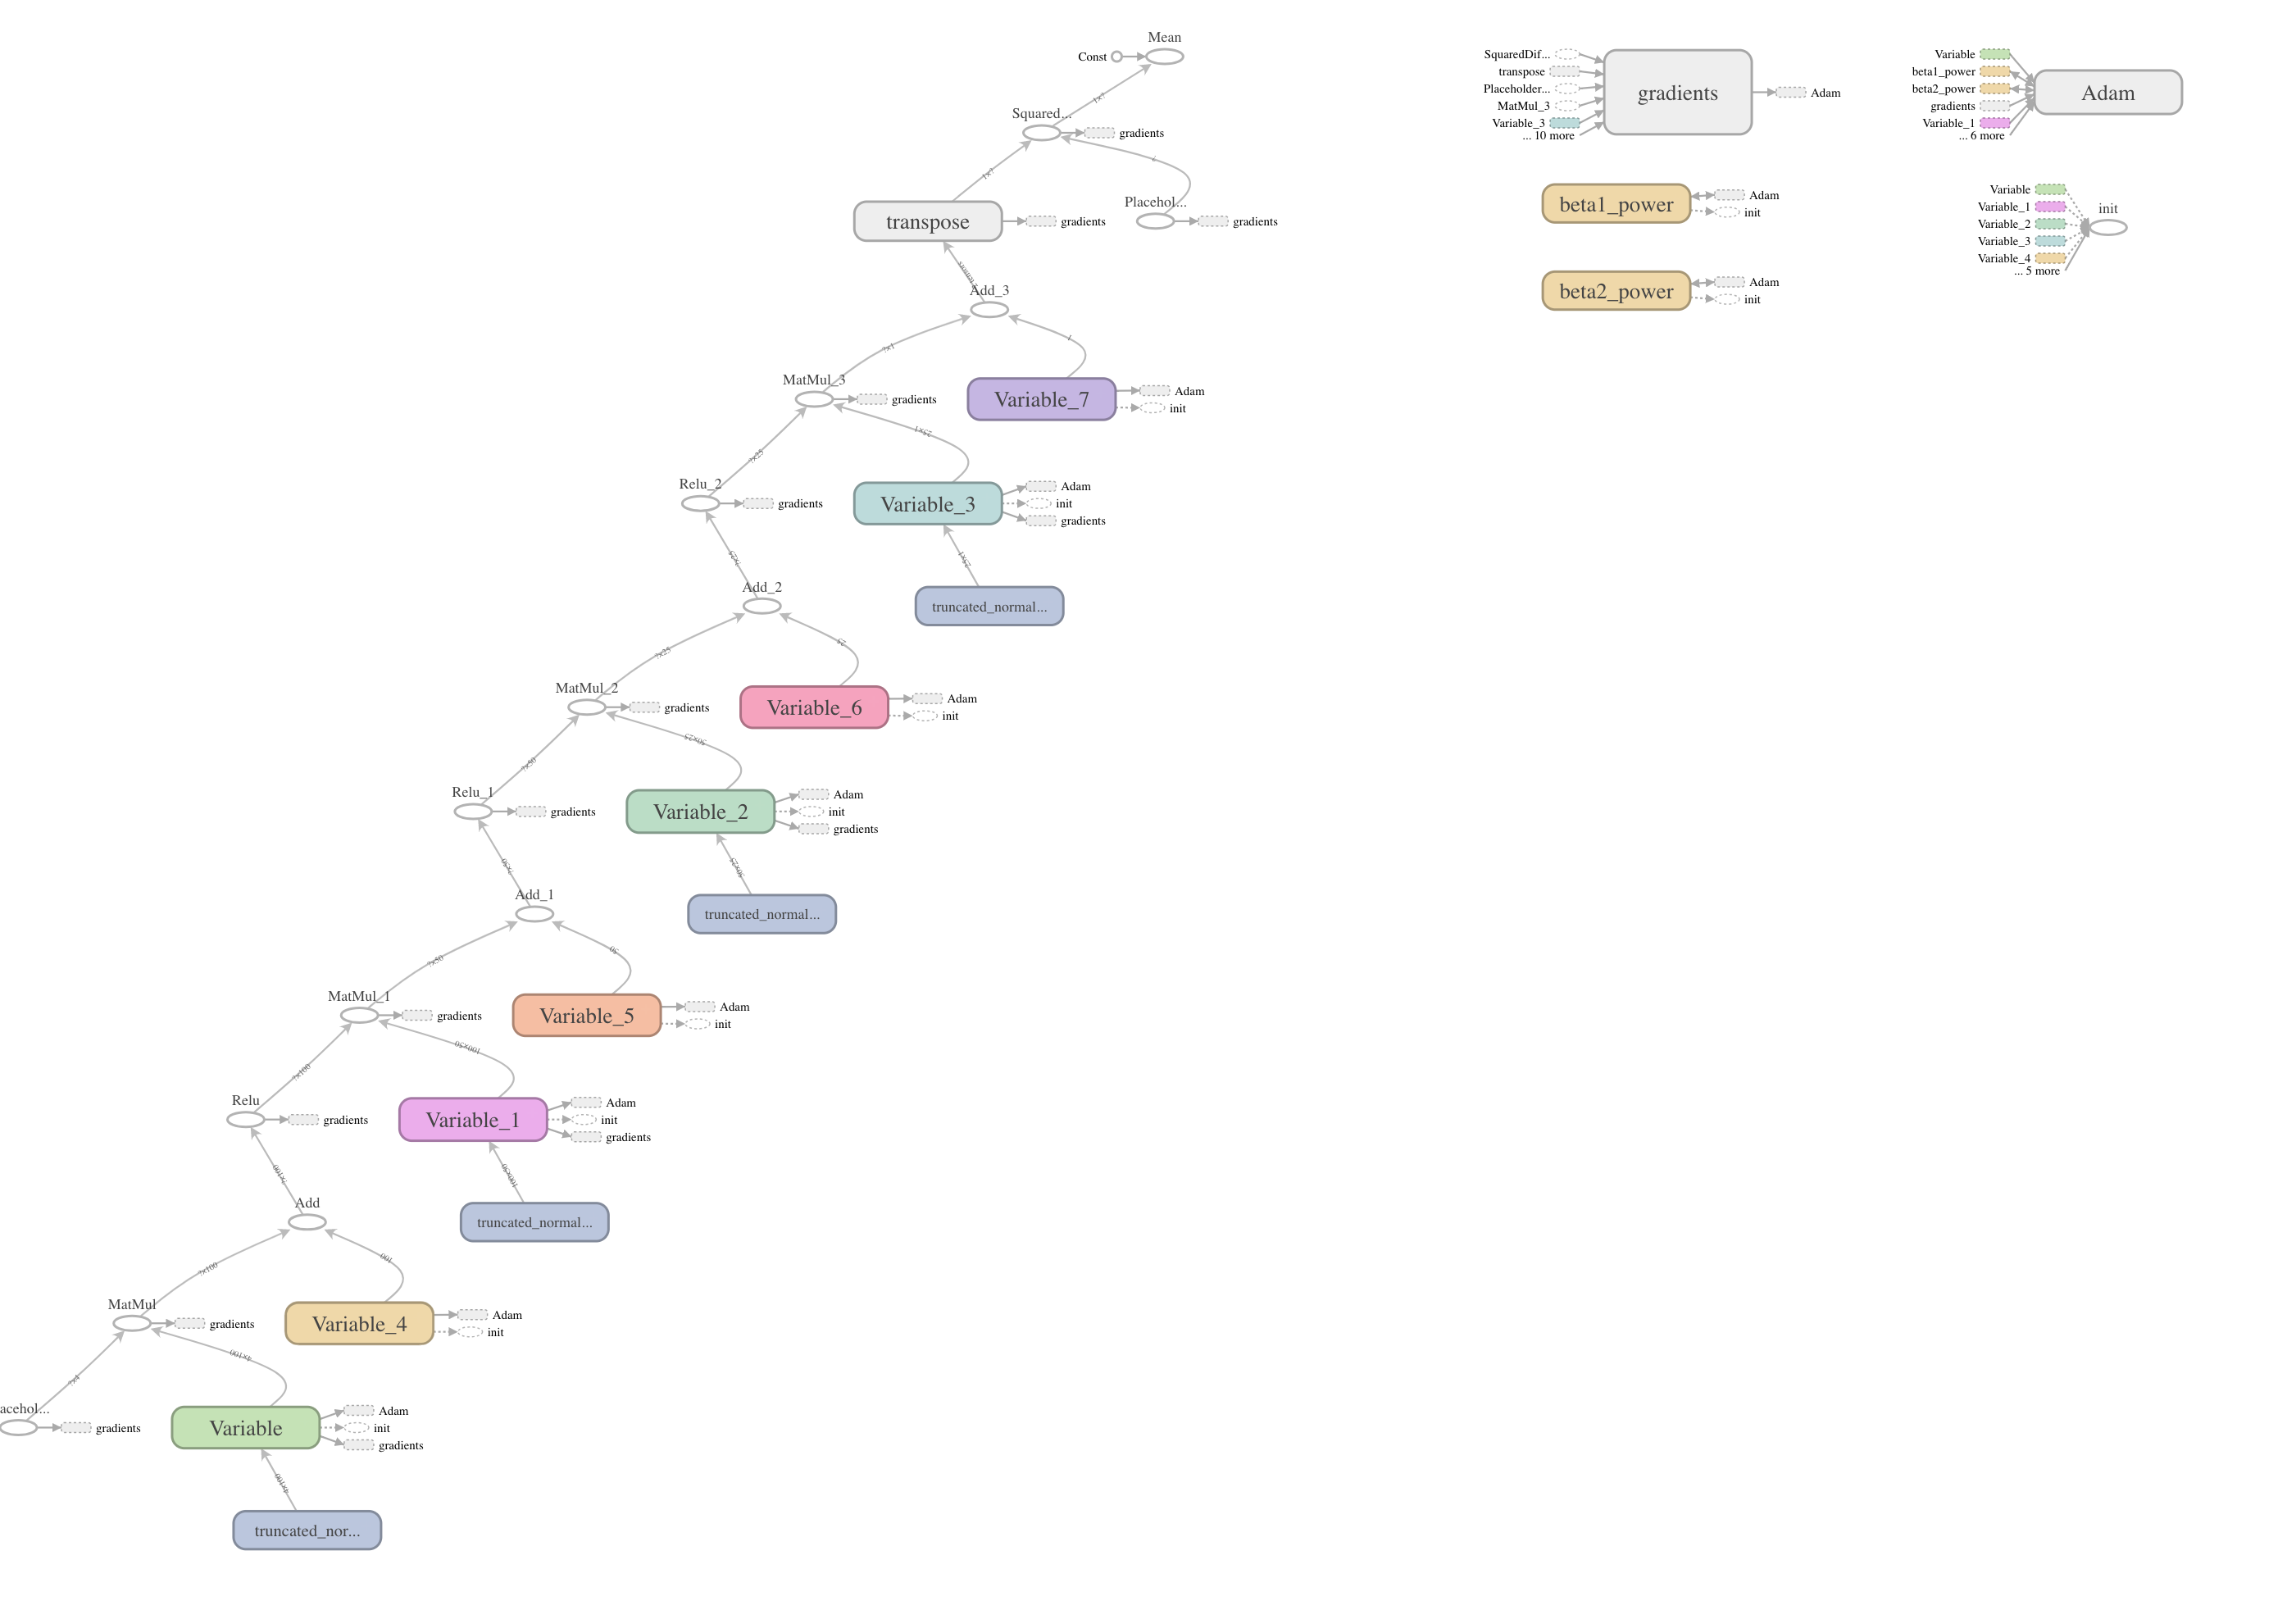

**Part D**

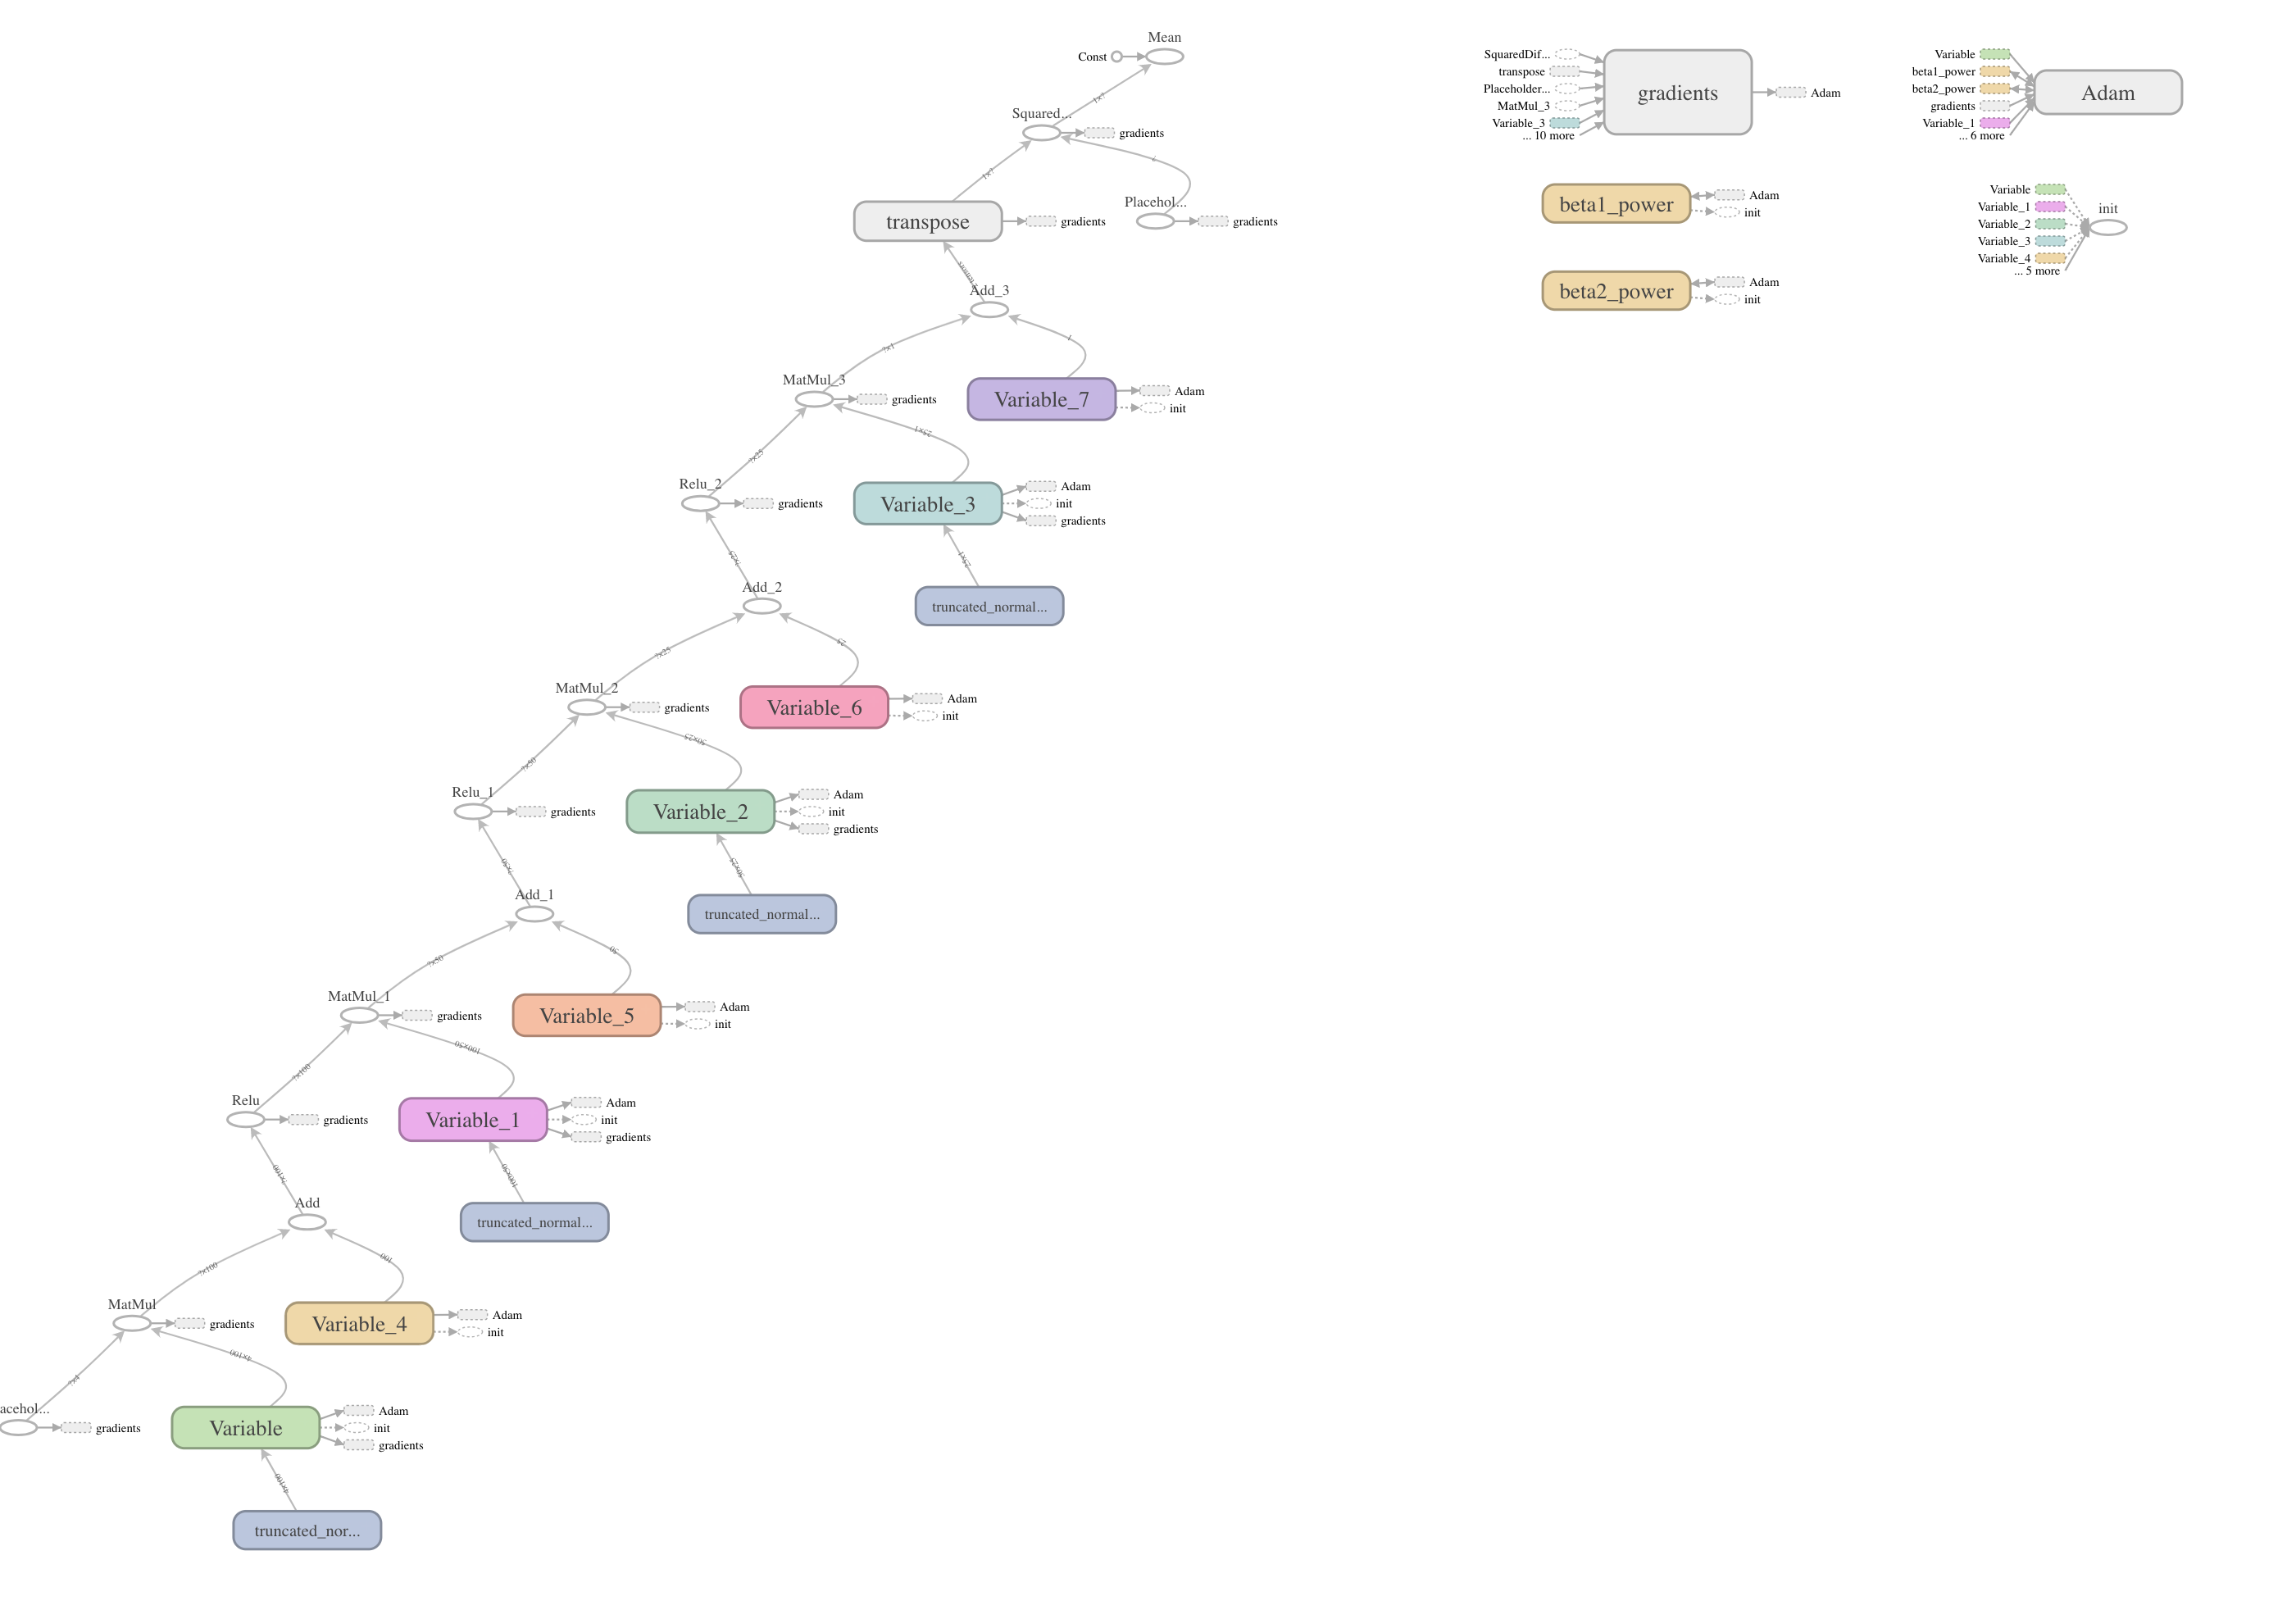

**Part E - Adagrad**

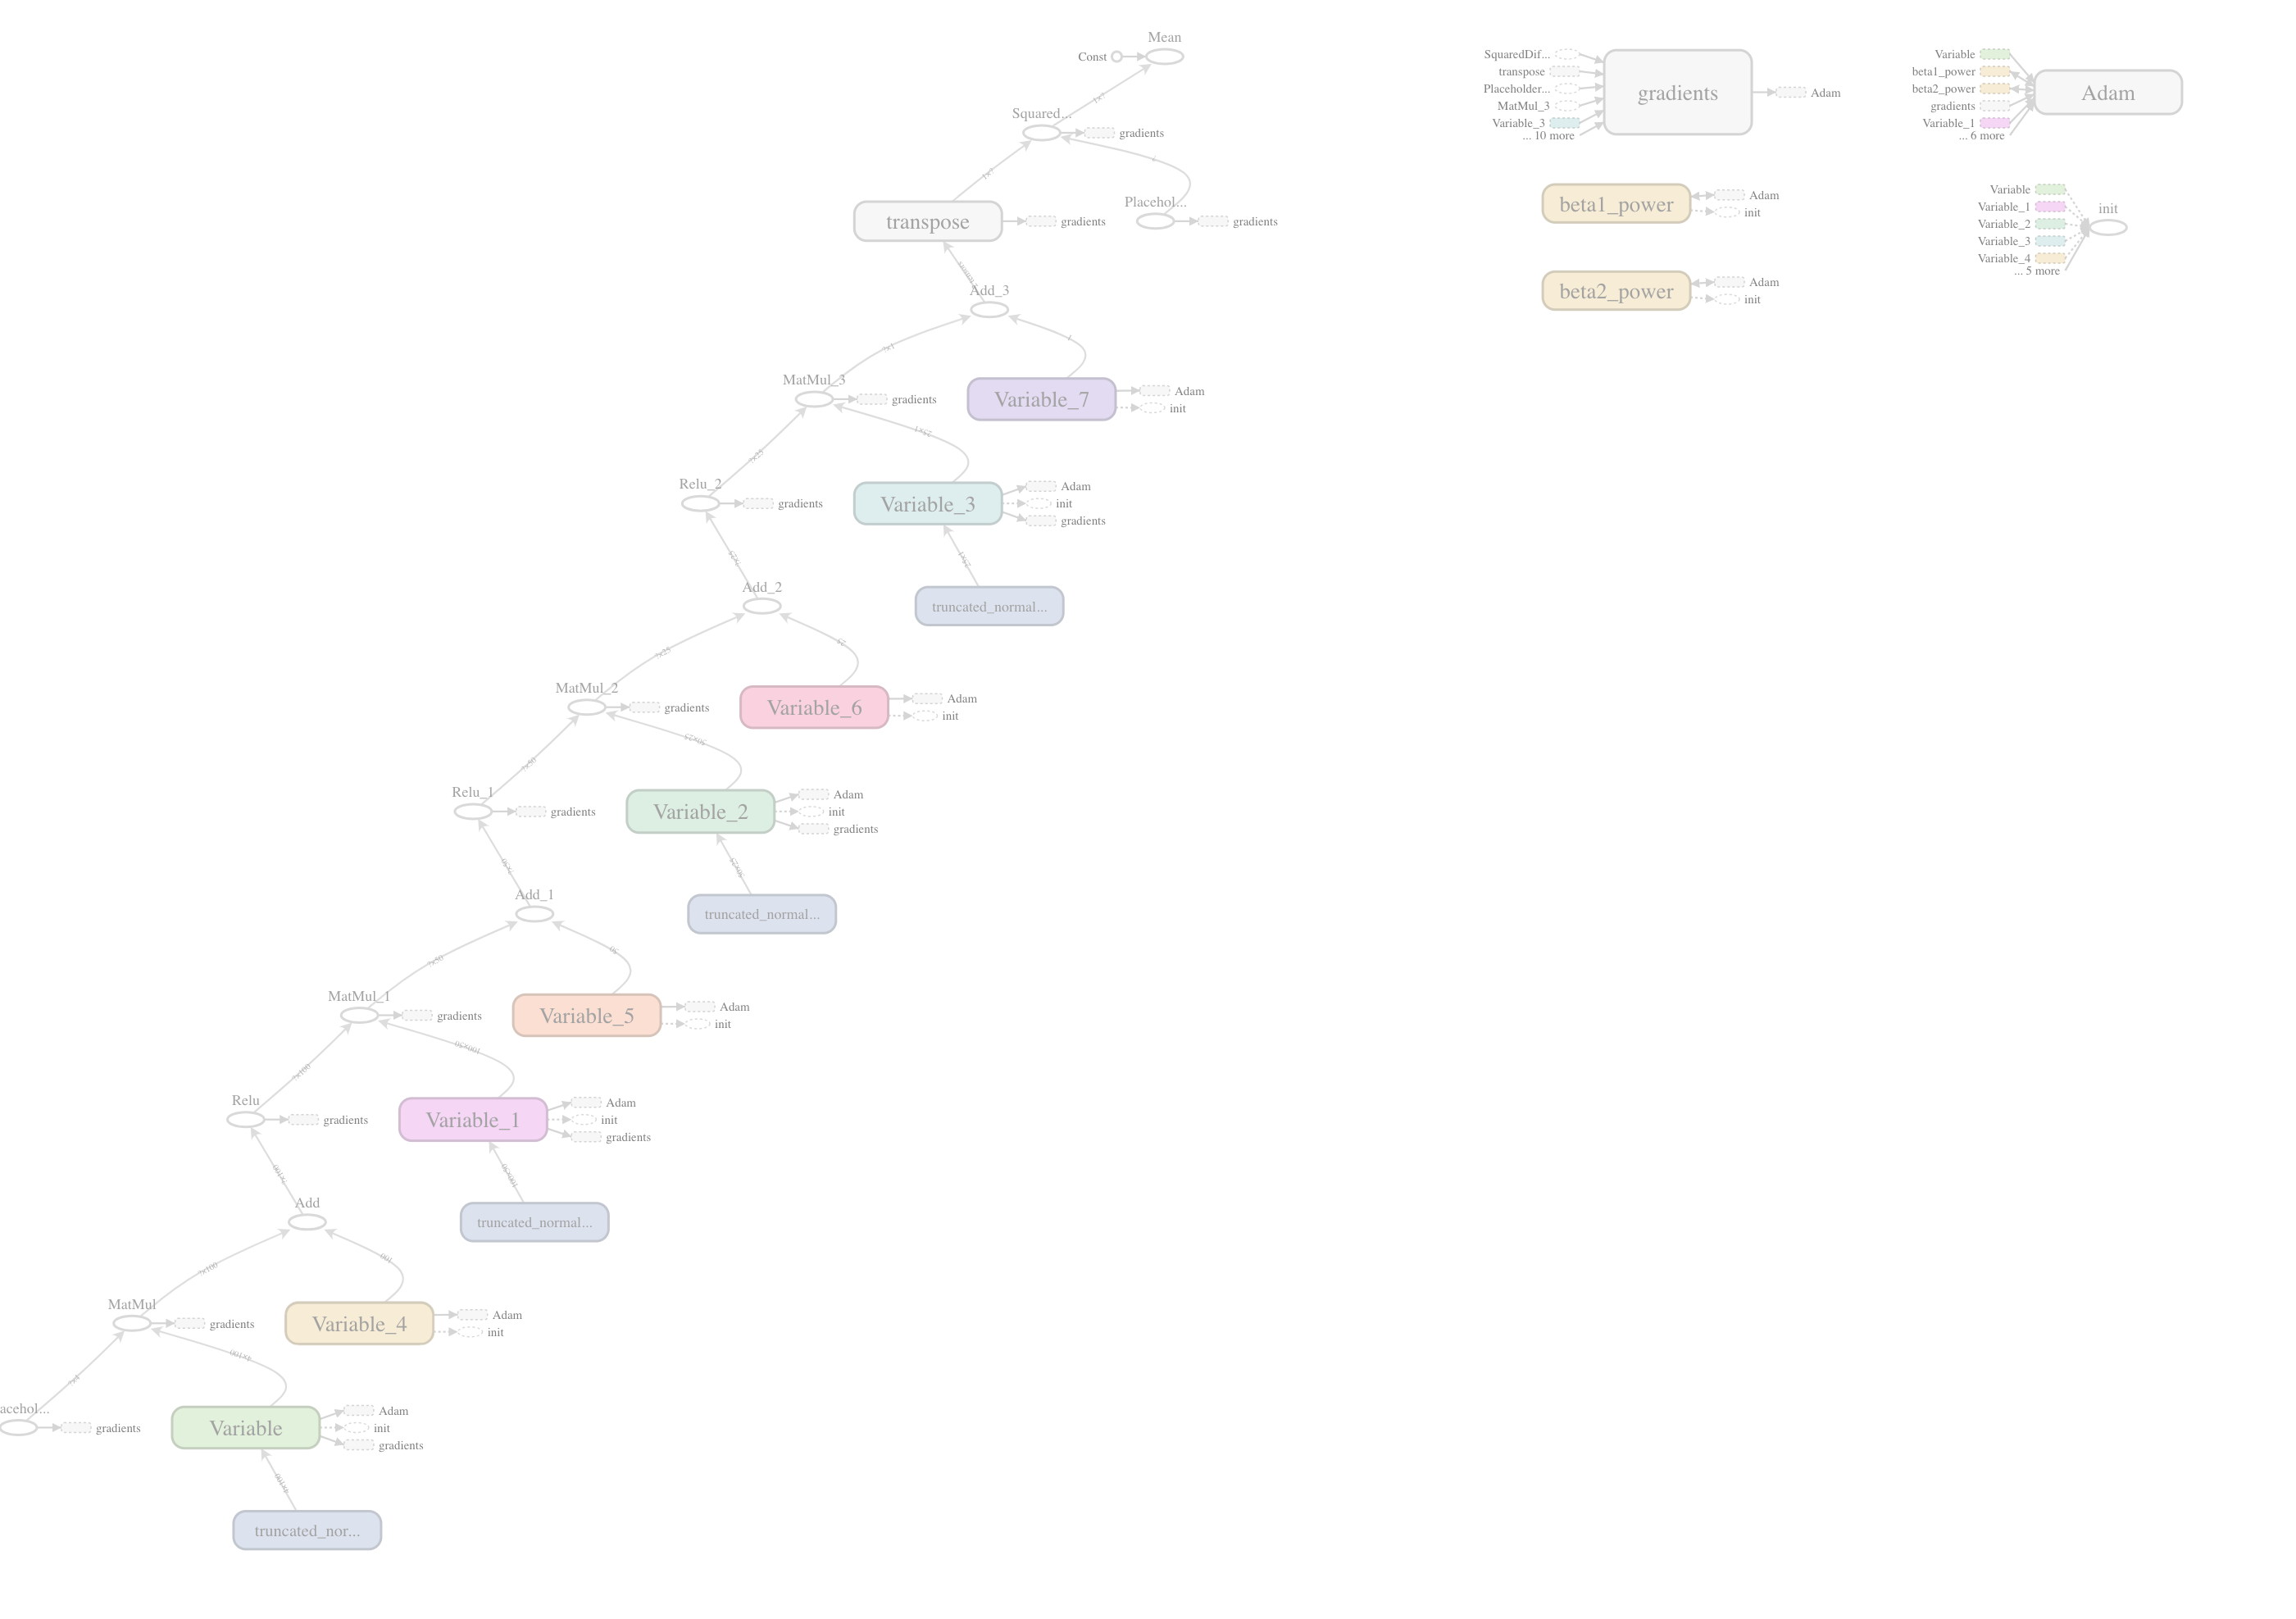

**Part E - RMSProp**

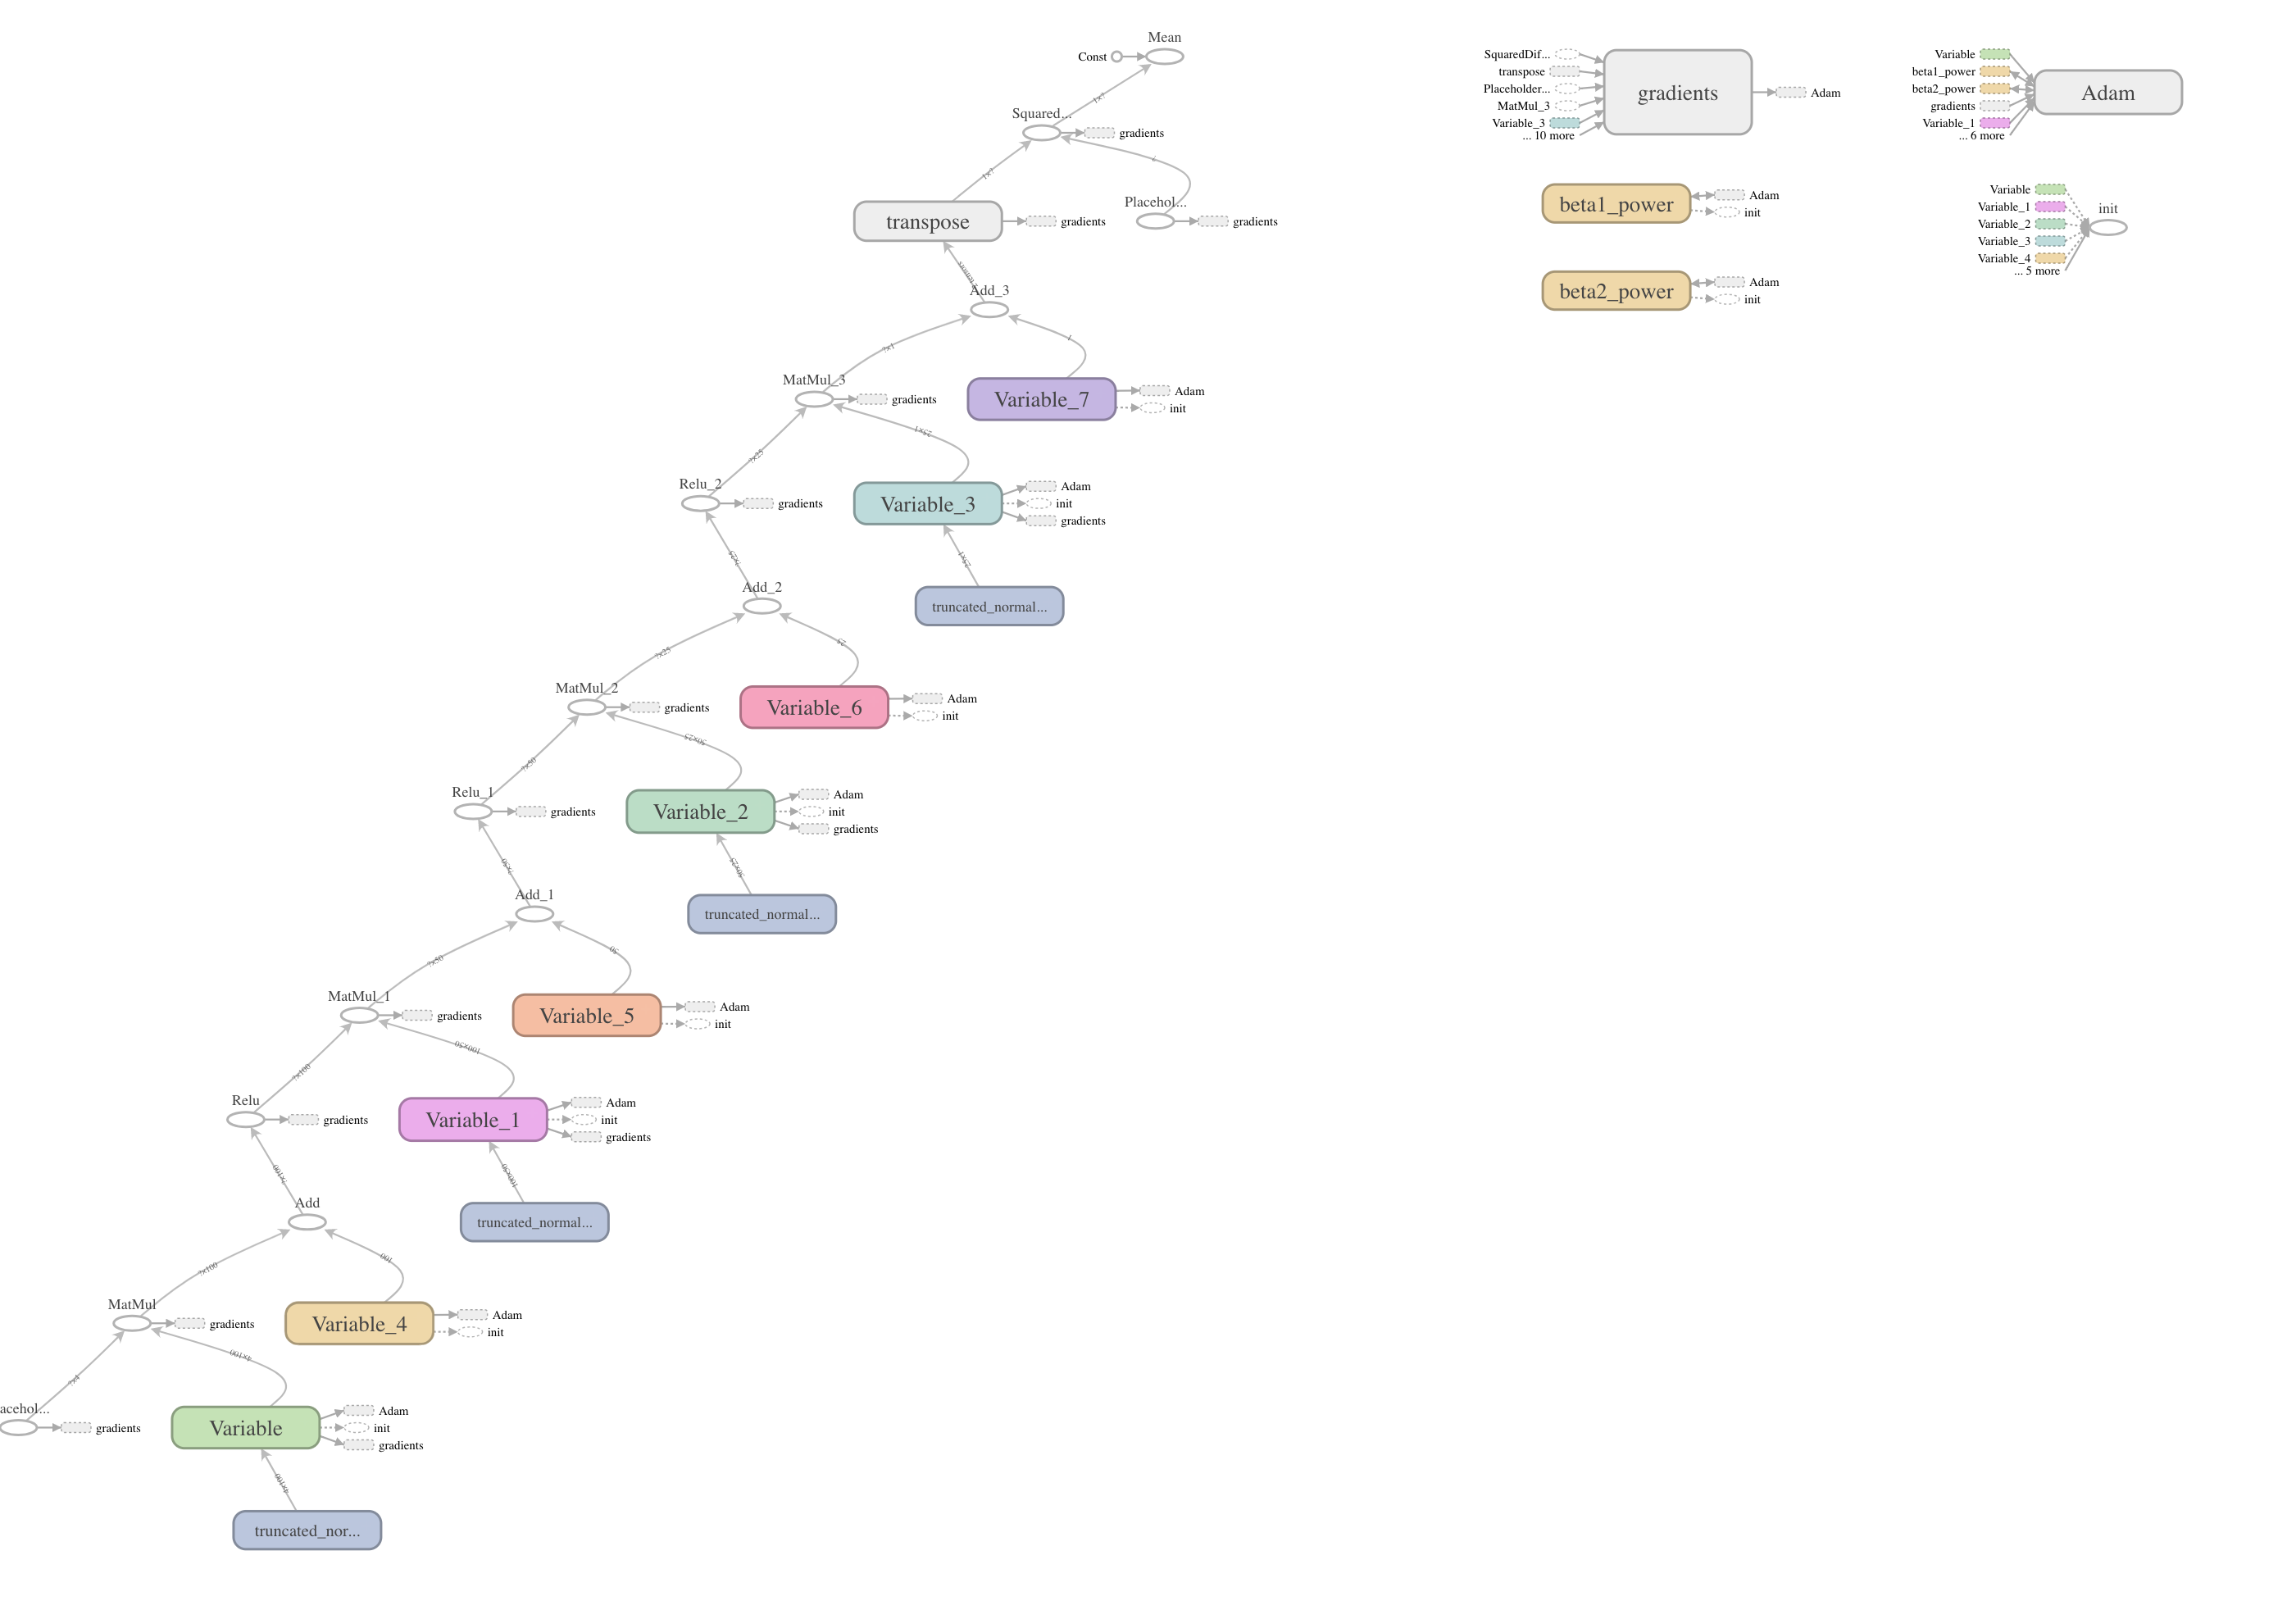

**Part F**

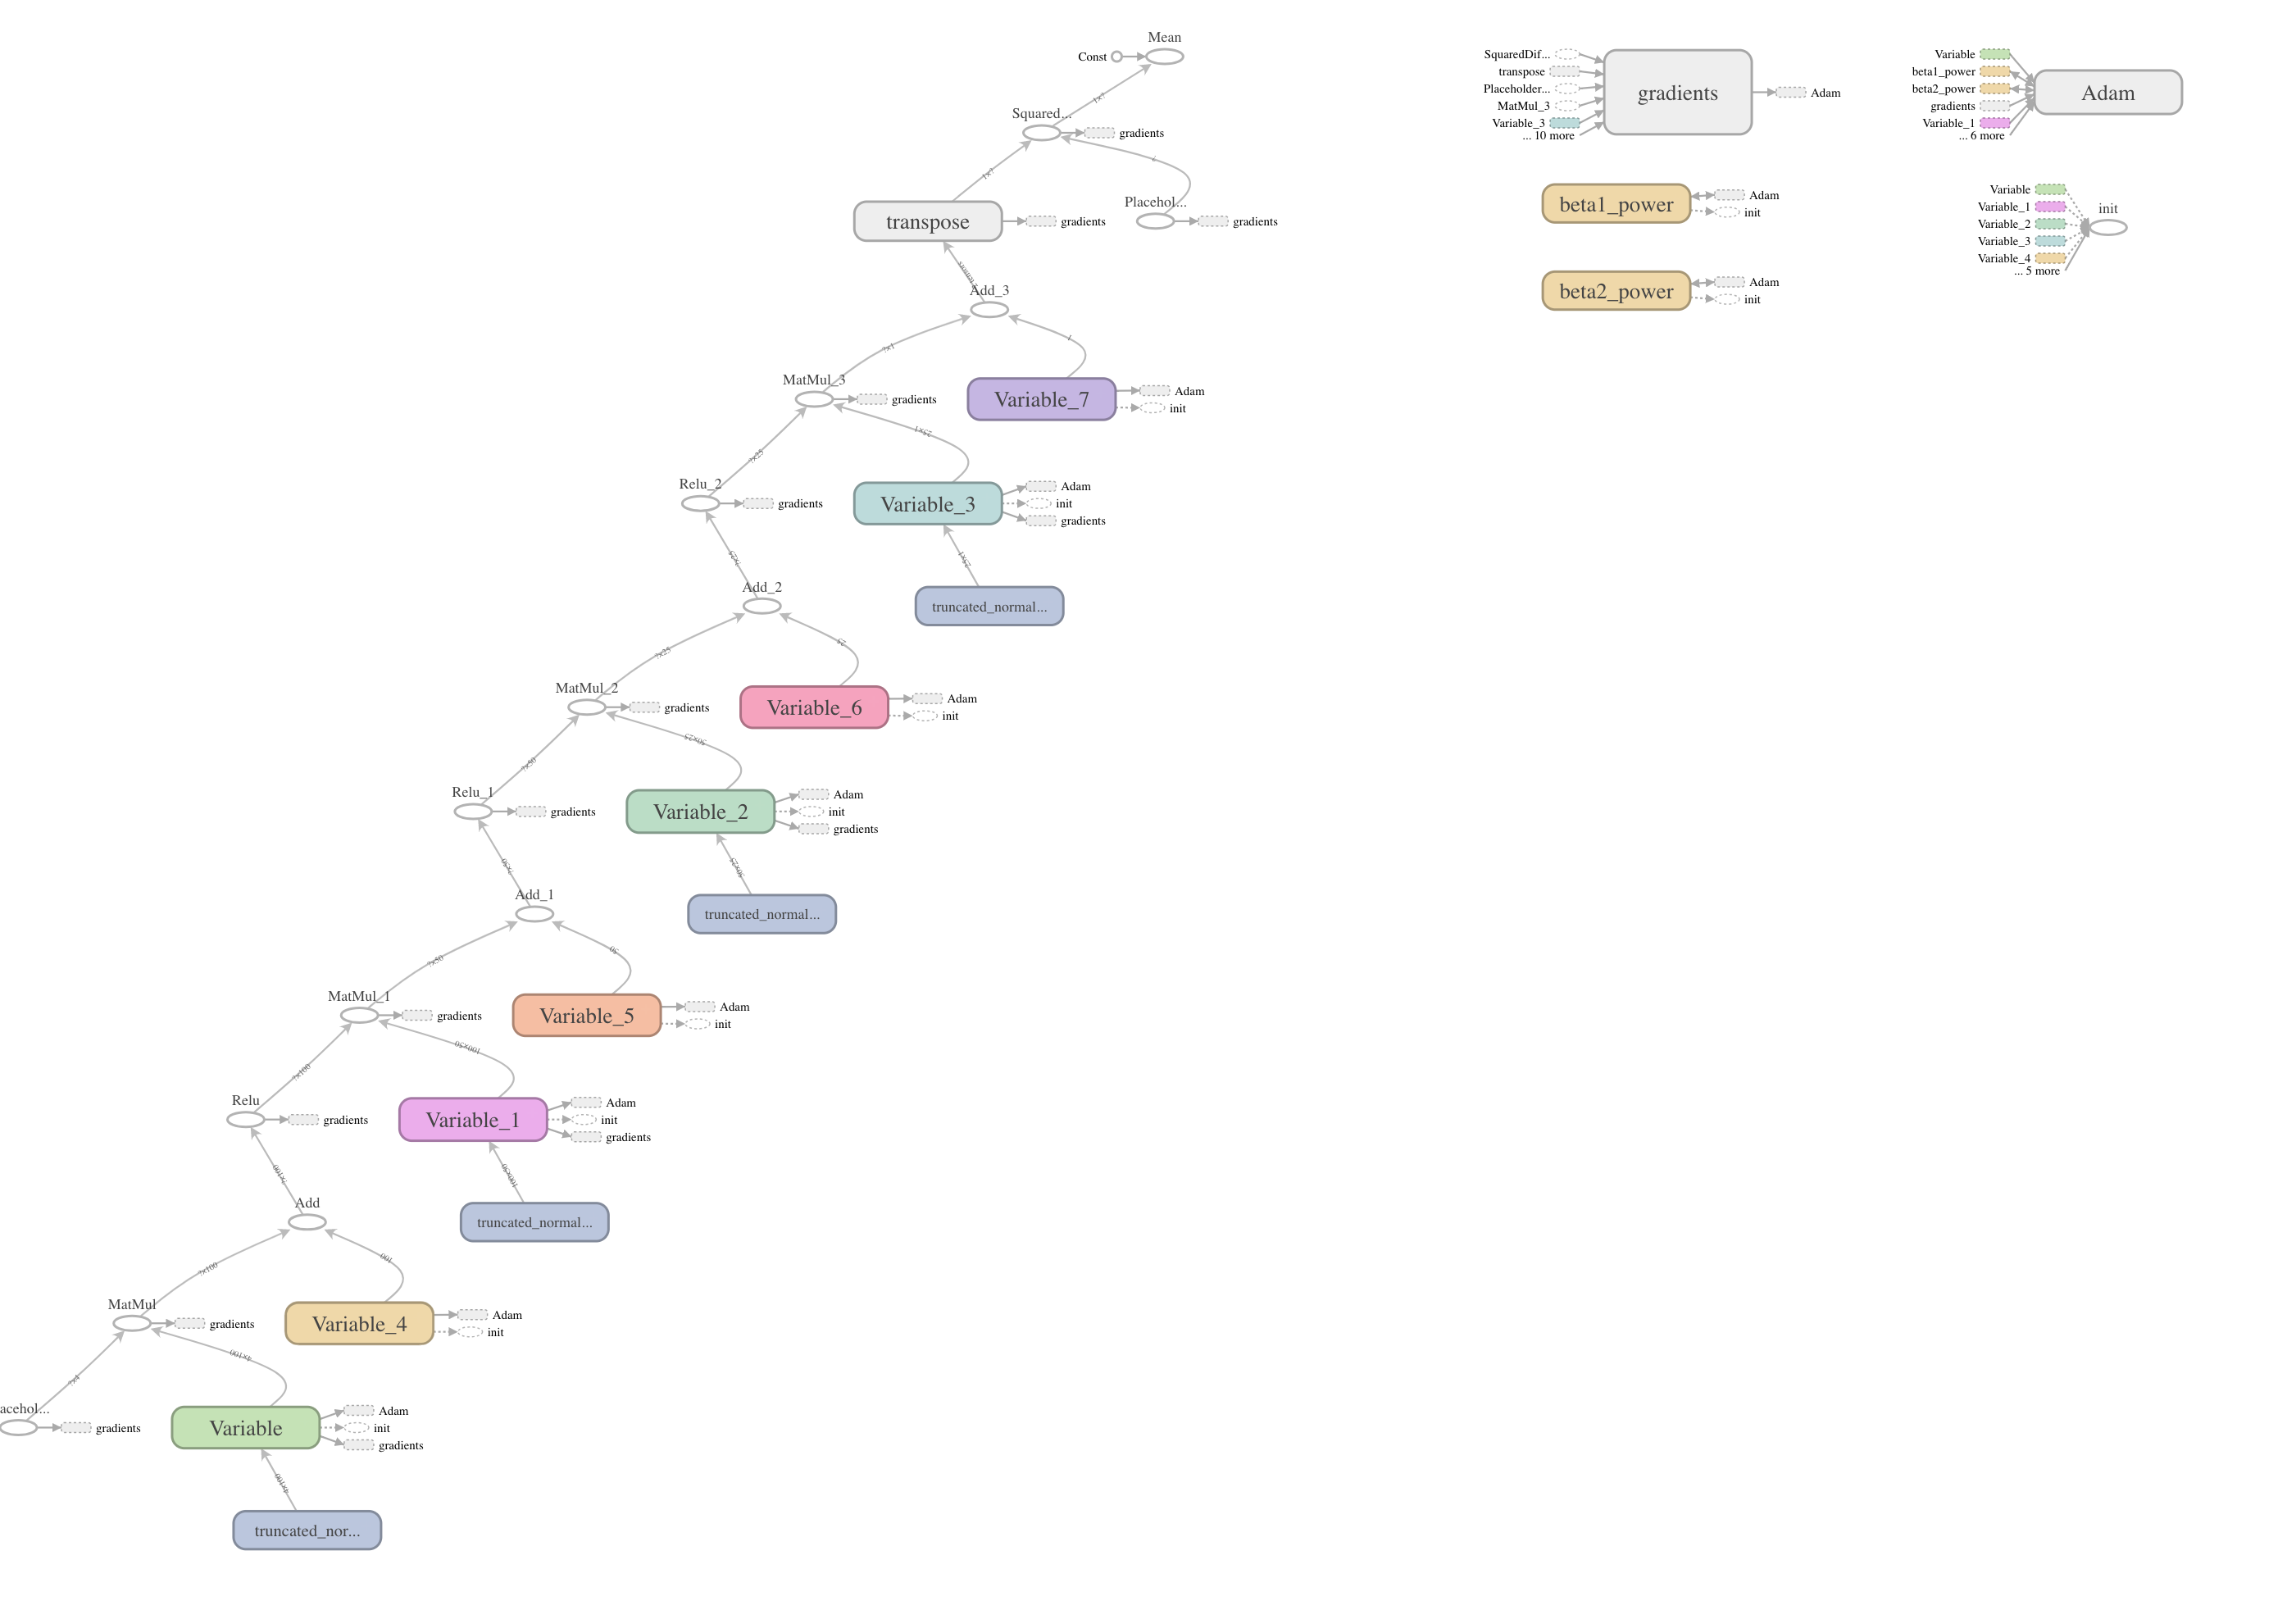

**Part G - Xavier Uniform**

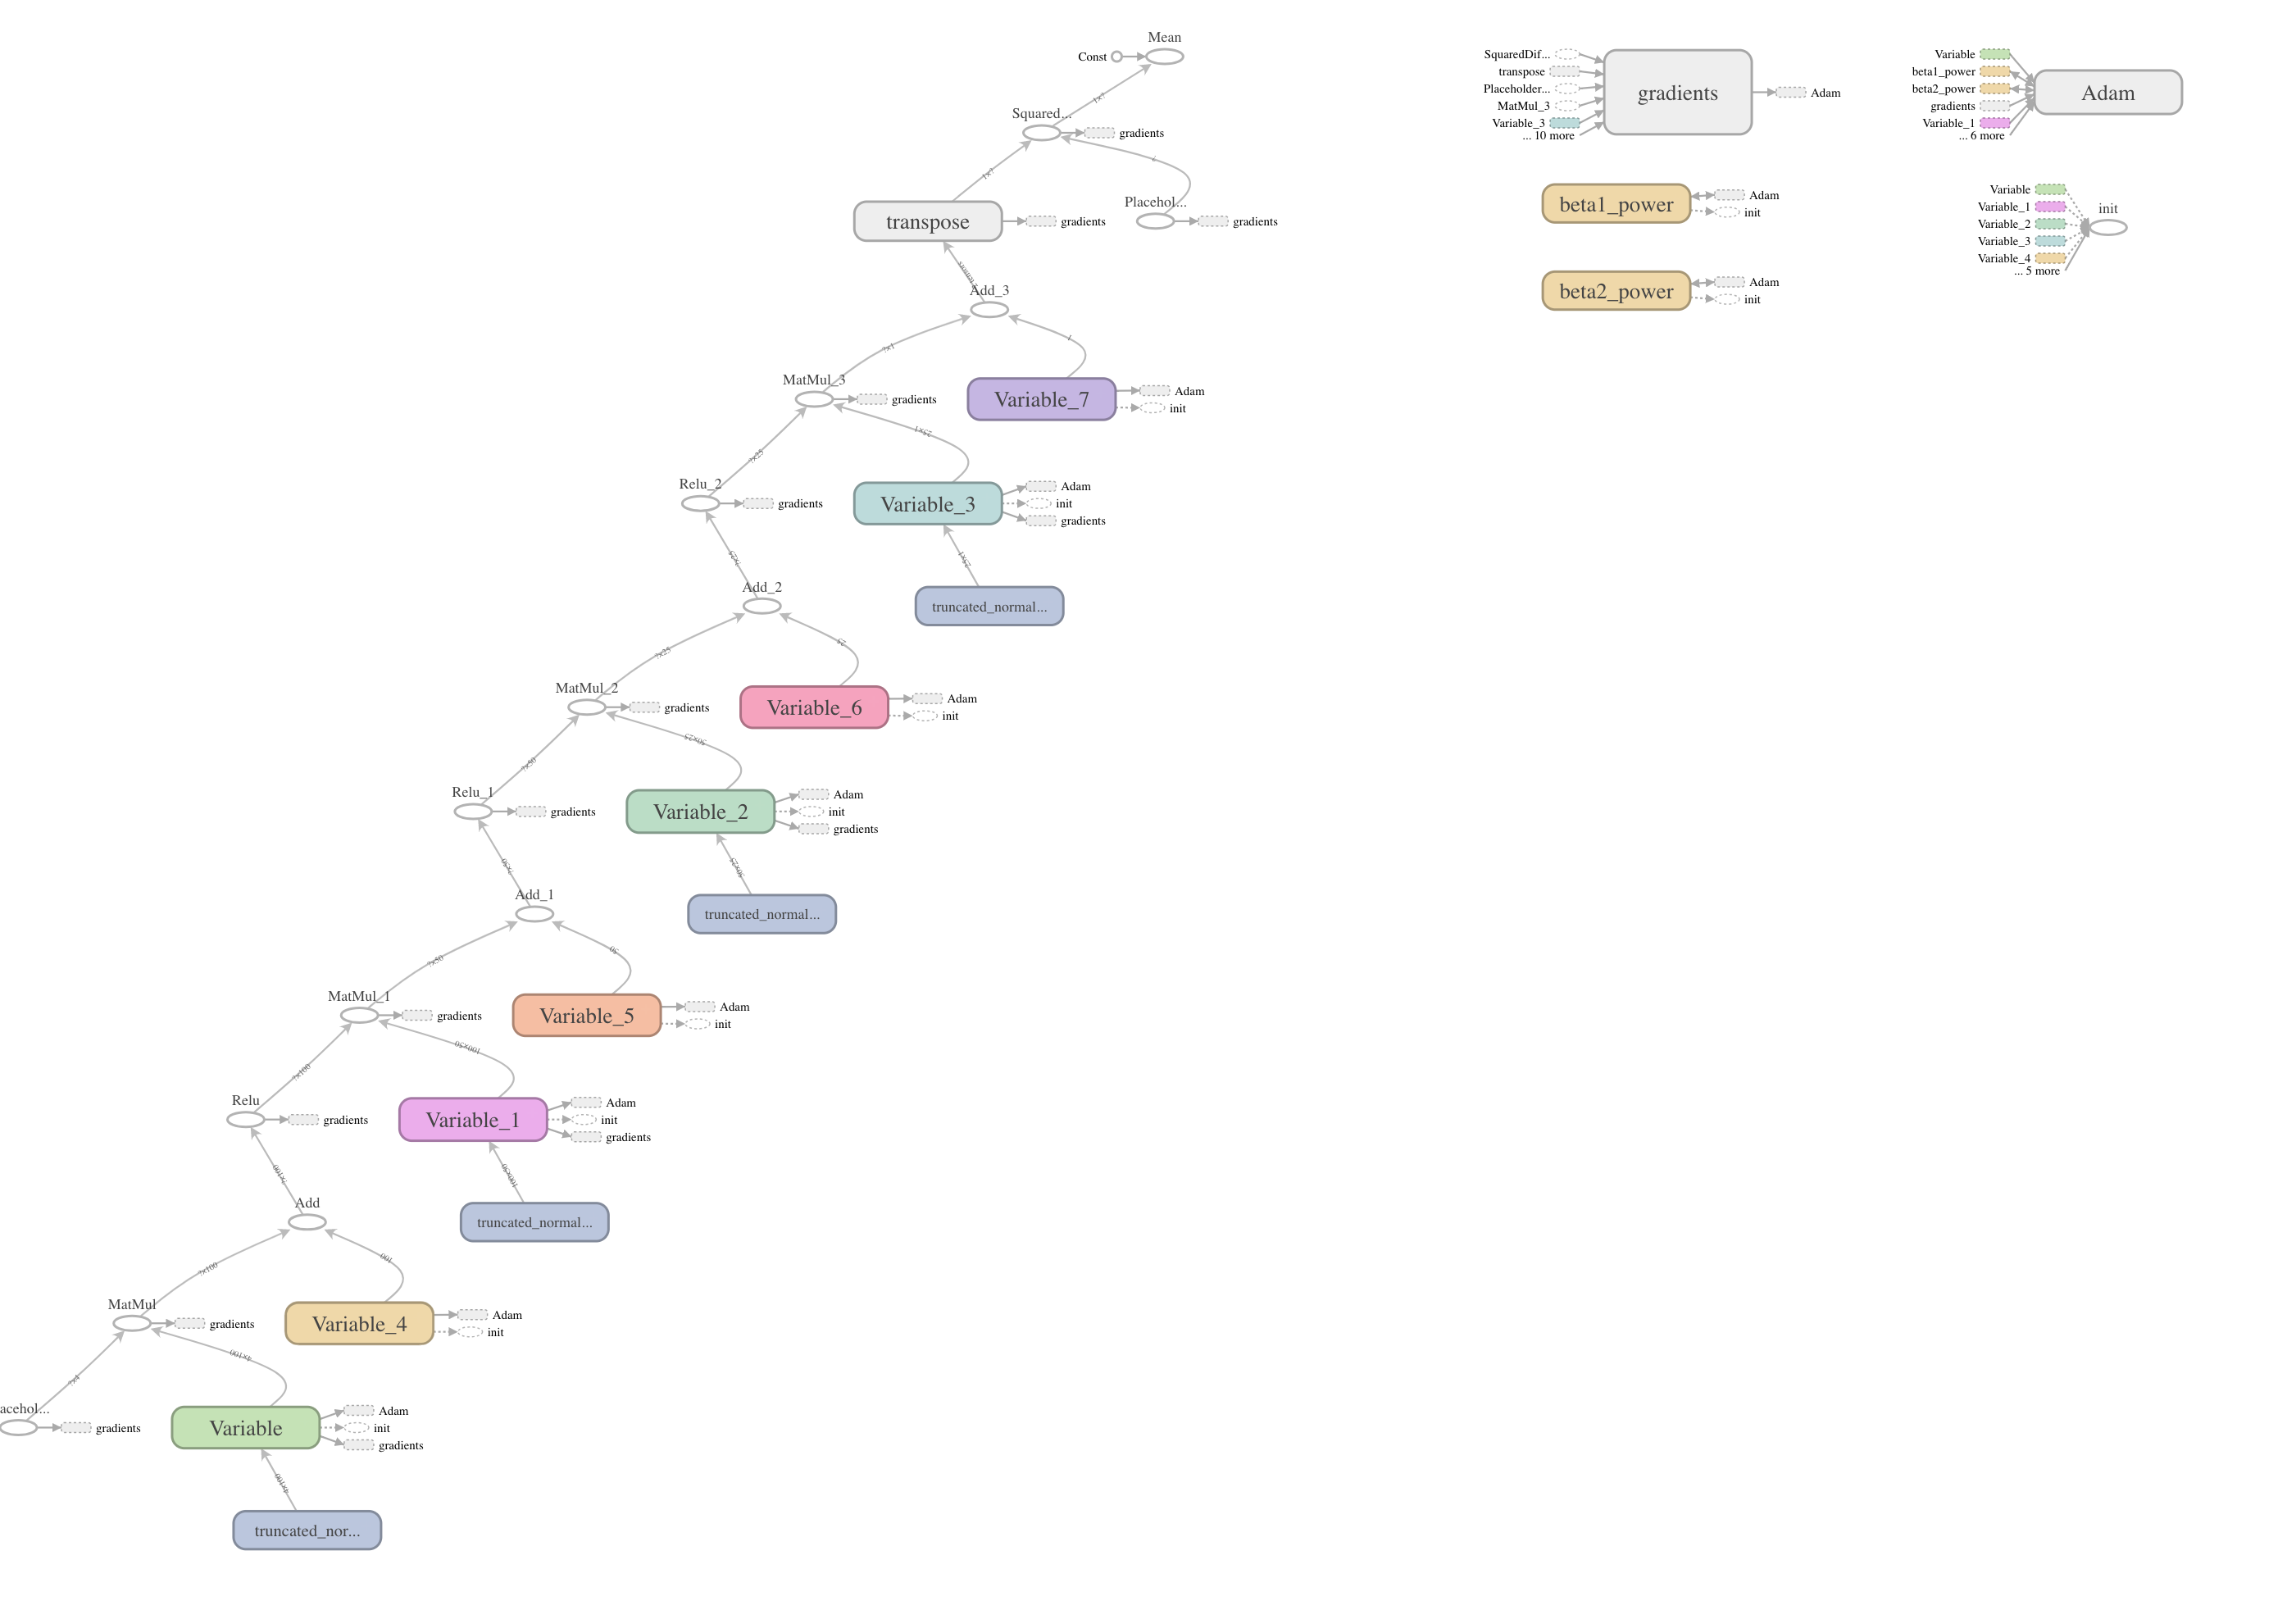

#### The End